<h1><center> CPT_S 570: MACHINE LEARNING </center></h1>
<h2><center> Project: Exploratory and Predictive Analysis of Coronary Heart Disease & Diabetes
 </center></h2>
<h3><center> Arnav Jain (011809037) </center></h3>
<h3><center> Krupa Doranalu (118908406) </center></h3>

### **1. Chronic Heart Disease Analysis**

The dataset is a subset of possible FHS dataset, having 4240 observations and 16 variables. The variables are as follows:

- sex : the gender of the observations. The variable is a binary named “male” in the dataset.
- age : Age at the time of medical examination in years.
- education : A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
- currentSmoker: Current cigarette smoking at the time of examinations
- cigsPerDay: Number of cigarettes smoked each day
- BPmeds: Use of Anti-hypertensive medication at exam
- prevalentStroke: Prevalent Stroke (0 = free of disease)
- prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated
- diabetes: Diabetic according to criteria of first exam treated
- totChol: Total cholesterol (mg/dL)
- sysBP: Systolic Blood Pressure (mmHg)
- diaBP: Diastolic blood pressure (mmHg)
- BMI: Body Mass Index, weight (kg)/height (m)^2
- heartRate: Heart rate (beats/minute)
- glucose: Blood glucose level (mg/dL)

And finally the response variable : + TenYearCHD : The 10 year risk of coronary heart disease(CHD).

#### Loading Data

In [ ]:
#importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the Dataset

df = pd.read_csv('/content/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
#Shape of dataset
df.shape


(4240, 16)

In [ ]:
print ('No. of Samples :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Samples : 4240 
No. of Features :  16


- We can see that our Dataset contains 4240 examples / predictors and 16 features (including Target).

In [ ]:
# datset's attribute info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


#### Data Cleansing

In [ ]:
#Examining Null values in each feature

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#%percent of null values

df.isnull().sum() / df.shape[0] * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

<Axes: >

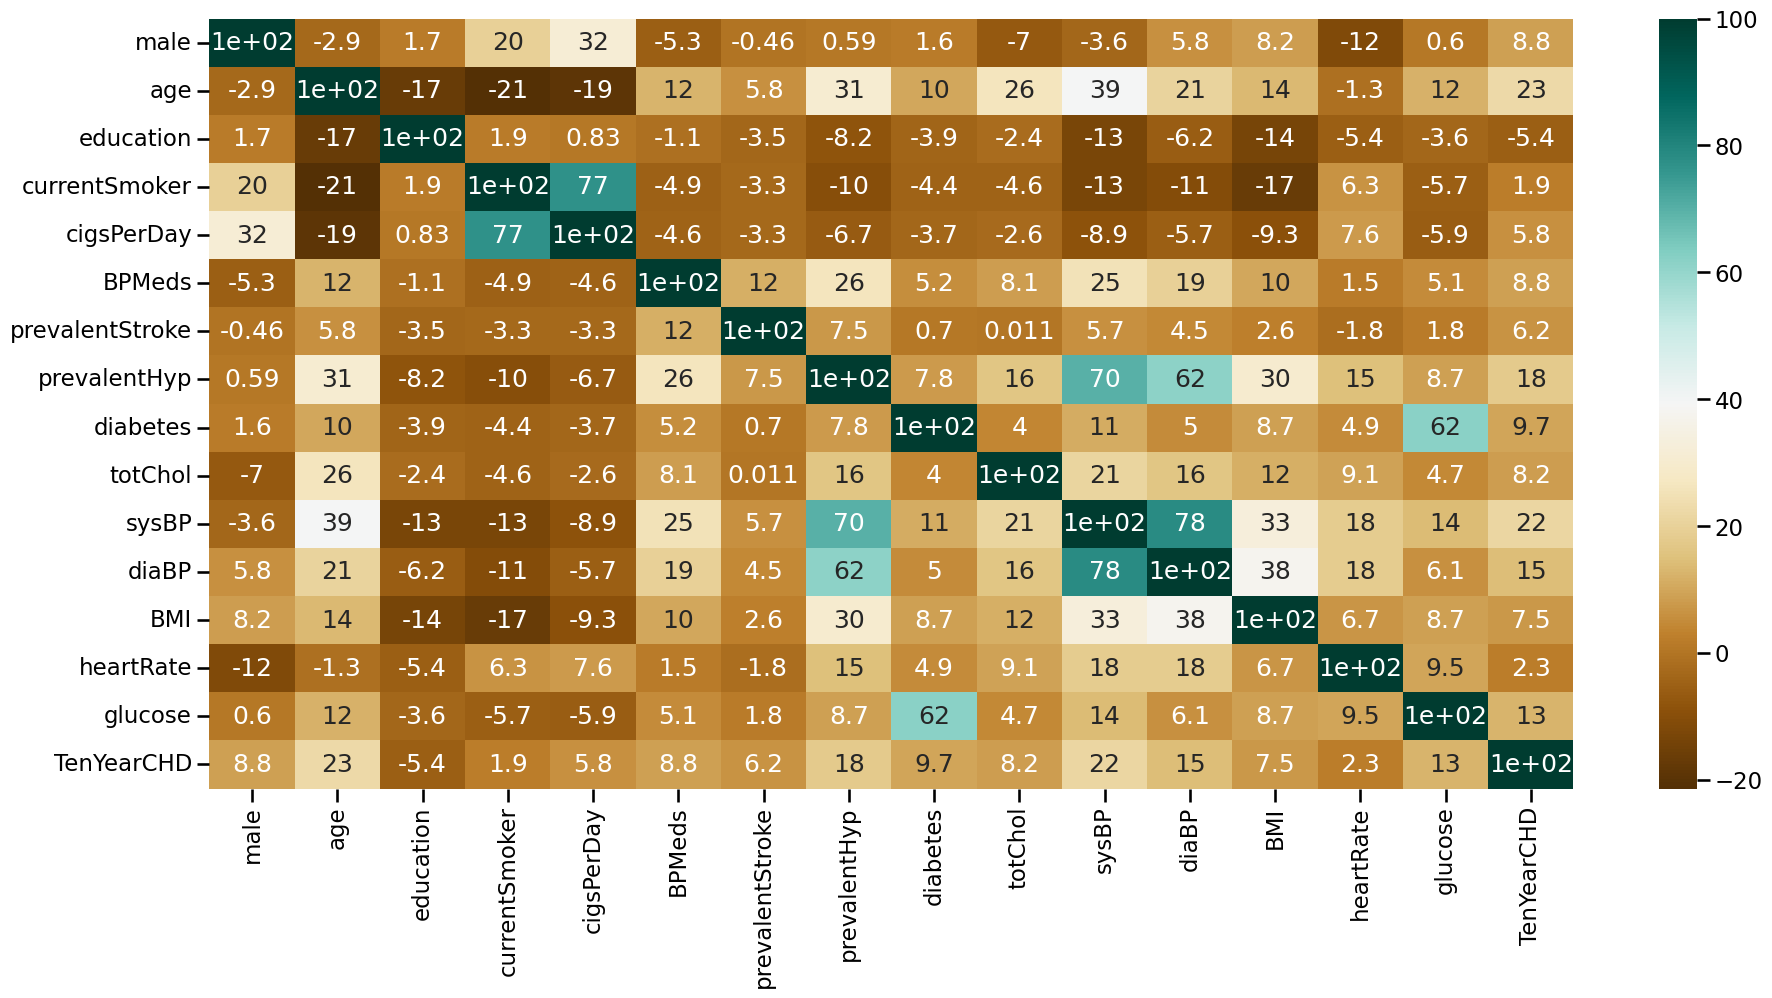

In [ ]:
#Pearson Correlation

sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(df.corr()*100, annot=True, cmap='BrBG')

Correlation plot gives us valuable information regarding Relation within Attributes. It can either be Negative or Positive or Null. We need to always keep 1 feature from 2 strongly correlated ones but since we want to perform EDA we'll keep all and drop them before modelling.


- currentSmoker and cigsPerDay has strong correlation of 77 (Scaled for better Observations)
- prevalentHyp vs sysBP / diaBP are having positive correlation of 70 and 62.
- glucose and diabetes are postively correlated.
- sysBP and diaBP are also having positive correlation.

In handling missing values within the dataset, conventional methods involve imputing null values with measures of central tendency such as mean, median, or mode. Alternatively, techniques like forward or backward filling are commonly employed. However, in our specific case, we can leverage insights from the correlation plot to inform a more context-aware imputation strategy. For instance, by examining the positive correlation between variables like 'currentSmoker' and 'cigsPerDay,' where 'currentSmoker' takes values of 1 (indicating a smoker) or 0 (indicating a non-smoker), we can capitalize on this relationship. Through a groupby operation on 'currentSmoker,' we can impute missing values based on the median value within each group. Similarly, for a variable like 'BMI,' we can take into account the correlation with 'Gender' and 'Age.' This enables a more tailored imputation approach, enhancing the accuracy and relevance of the imputed values based on the inherent relationships observed in the data.

In [ ]:
# To handle missing values
#User defined function for missing value imputation

def impute_median(data):
    return data.fillna(data.median())

In [ ]:
#median imputation

df.glucose = df['glucose'].transform(impute_median)
df.education = df['education'].transform(impute_median)
df.heartRate = df['heartRate'].transform(impute_median)
df.totChol = df['totChol'].transform(impute_median)
df.BPMeds = df['BPMeds'].transform(impute_median)

## group by classes that are in relation with other classes

by_currentSmoker = df.groupby(['currentSmoker'])
df.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = df.groupby(['male','age'])
df.BMI = by_age['BMI'].transform(impute_median)

In [ ]:
#Rechecking if we have any missing value left

df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### EDA

In [ ]:
#Descriptive Stats

df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798756,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.072774,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.397500,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Some the features are Discrete so let us analyze continuous ones

- **Age** : We can see that Min. age of subject found in given records is 32 while Max. being 70. So our values are ranging from 32 to 70.


- **cigsPerDay** : Subject smoking Cig. per day is as low as nill while we have 70 Cigs. per day making the Peak.


- **totChol** : Min. Cholesterol level recorded in our dataset is 107 while Max. is 696.


- **sysBP** : Min. Systolic Blood Pressure observed in Subject is 83 while Max. is 295.


- **diaBP** : Min. Diastolic Blood Pressure observed in Subject is 48 while Max. is 142.


- **BMI** : Body Mass Index in our dataset ranges from 15.54 to 56.


- **heartRate** : Observed Heartrate in our case study is 44 to 143.


- **glucose** : Glucose sugar level range is 40 to 394.

Text(0.5, 1.0, 'CHD by Gender')

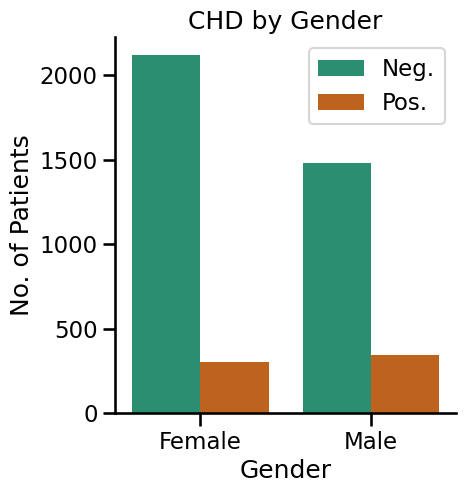

In [ ]:
#CHD by Gender Viz.

sns.catplot(x='male', hue='TenYearCHD', data=df, kind='count', palette='Dark2', legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')

The bivariate analysis plot illustrates the distribution of individuals with and without Chronic Heart Disease (CHD) based on gender. Notably, there is a considerable prevalence of individuals who do not have CHD. Specifically, around 80 to 90\% of females and approximately 60 to 70\% of males fall into the negative category, indicating the absence of CHD. In contrast, the positive category, signifying individuals with CHD, encompasses roughly 10\% of both females and males.

This pattern reveals a notable class imbalance within our dataset, where the majority, ranging from 80 to 90\%, corresponds to negative classifications (no CHD), while the positive classifications (presence of CHD) constitute approximately 10 to 15\%. Understanding this class distribution is crucial for model development and evaluation, as it highlights the need for strategies to address potential biases and optimize predictive performance in the context of imbalanced data.

<ipython-input-15-76b96767e651>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['glucose'] , color='orange')
<ipython-input-15-76b96767e651>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['totChol'], color='g')
<ipython-input-15-76b96767e651>:15: UserWarning: 

`distplot` is a deprecat

Text(0.5, 1.0, 'Distribution of HeartRate')

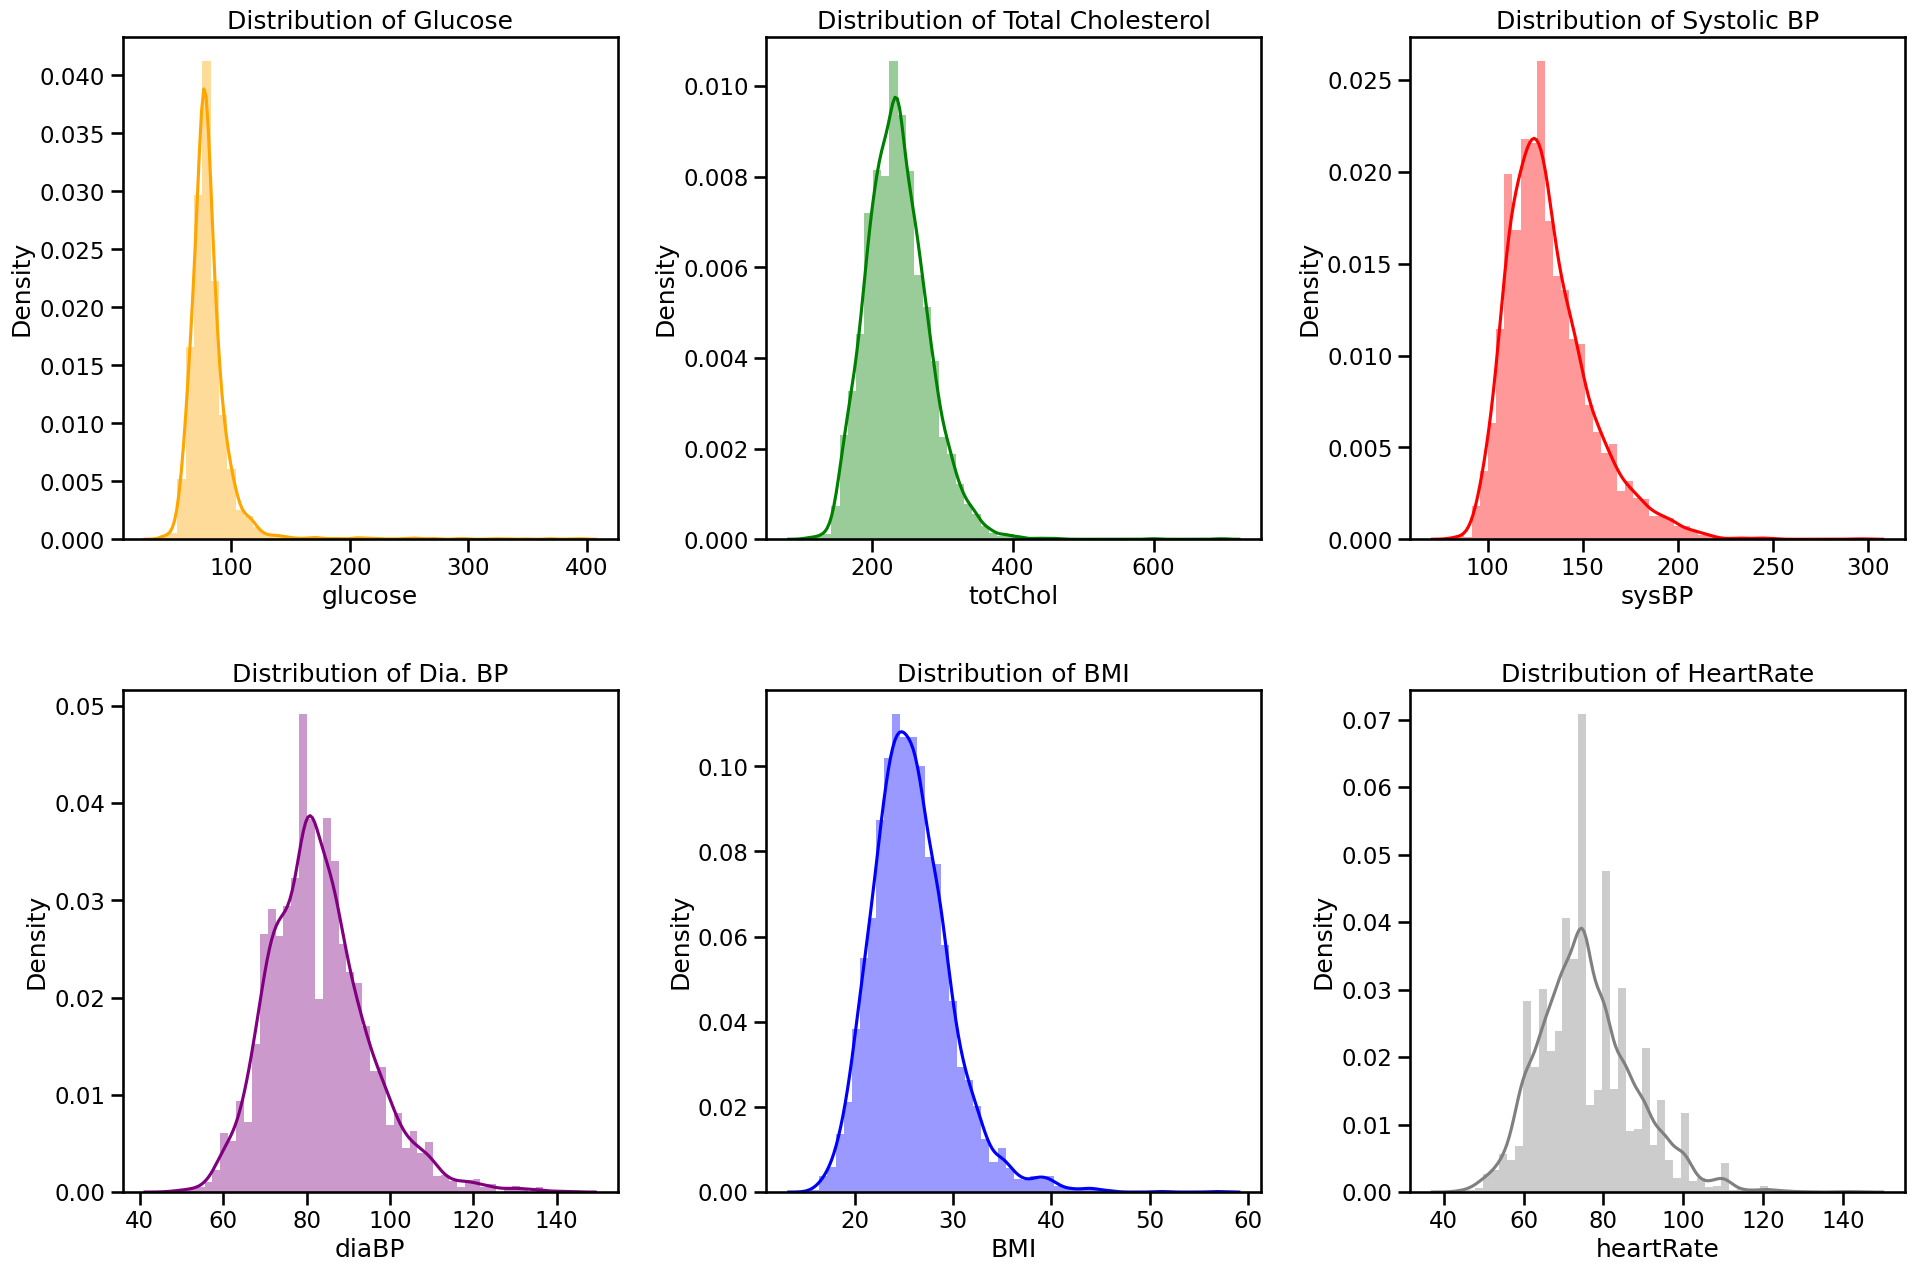

In [ ]:
#Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(df['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(df['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(df['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(df['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(df['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(df['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

- Glucose: The distribution of glucose levels is skewed to the right, with a median of 98 mg/dL and a long tail extending to higher values. This indicates that a majority of the participants have normal glucose levels, but there is a significant minority with elevated glucose levels.
- Total cholesterol: The distribution of total cholesterol levels is also skewed to the right, with a median of 219 mg/dL and a tail extending to higher values. This indicates that a majority of the participants have normal cholesterol levels, but there is a significant minority with high cholesterol levels.
- The distribution of systolic blood pressure is right-skewed, with a median of 120 mmHg and a long tail extending towards higher values.
- The distribution of body mass index (BMI) is right-skewed, with a median of 25 kg/m\^2 and a long tail extending towards higher values.

- The right-skewed nature of the above features indicates that the majority of individuals have values within a certain range, but there is a significant tail towards higher values. This suggests that a substantial portion of the population has elevated levels of these risk factors, which could increase their risk of developing cardiovascular disease.
- The distribution of diastolic blood pressure is close to Normal/Gaussian distribution, with a median of 80 mmHg. This means a lot of subjects in the dataset have a normal diastolic blood pressure.
- The distribution of heart rate is approximately normal, with a median of 70 beats per minute (bpm). This indicates that the majority of individuals have heart rates within a healthy range.

Overall, the density graph suggests that a significant proportion of the participants have elevated levels of glucose, total cholesterol, systolic BP and BMI. These are all risk factors for cardiovascular disease and other chronic diseases.

<ipython-input-16-3d5eaae4f51e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=15, kde=True, color='maroon')


Text(0.5, 1.0, 'Agewise distribution of the patients')

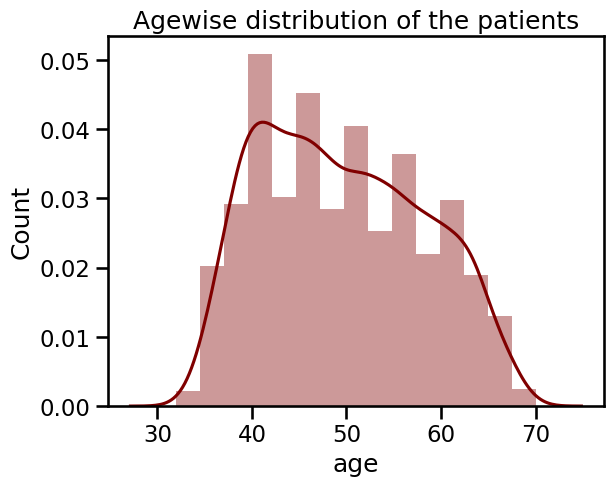

In [ ]:
# Agewise distribution

sns.distplot(df['age'], bins=15, kde=True, color='maroon')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

The x-axis represents the age of the patients, and the y-axis represents the count of patients. The graph shows that the majority of the patients in the dataset are between the ages of 40 and 70. According to the above graph we can say that majority lie between 40-50 followed by 50-70. The number of patients gradually decreases before and after this age range. This is consistent with the fact that cardiovascular disease is more common in older adults.

In [ ]:
#User-defined function

#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#applying functions
df['enc_hr'] = df['heartRate'].apply(heartrate_enc)
df['encode_age'] = df['age'].apply(lambda x : encode_age(x))

- Above Functions will Encode Age and Heart Rate.


- We can encode the Age Group Further :
    - Subject with **Age <= 40** are **Adults.**
    - Subject with **Age > 40 and <= 55** are **Middle-Aged Adult.**
    - Subject **Above 55** will fall in **Senior** Category.


- We'll Encode HeartRate as follows:
    - HeartRate **<= 60** is **Low / Resting** HeartBeat.
    - HeartRate **between 60 to 100** is considered as **Normal.**
    - While, HeartRate **above 100** is **High.**

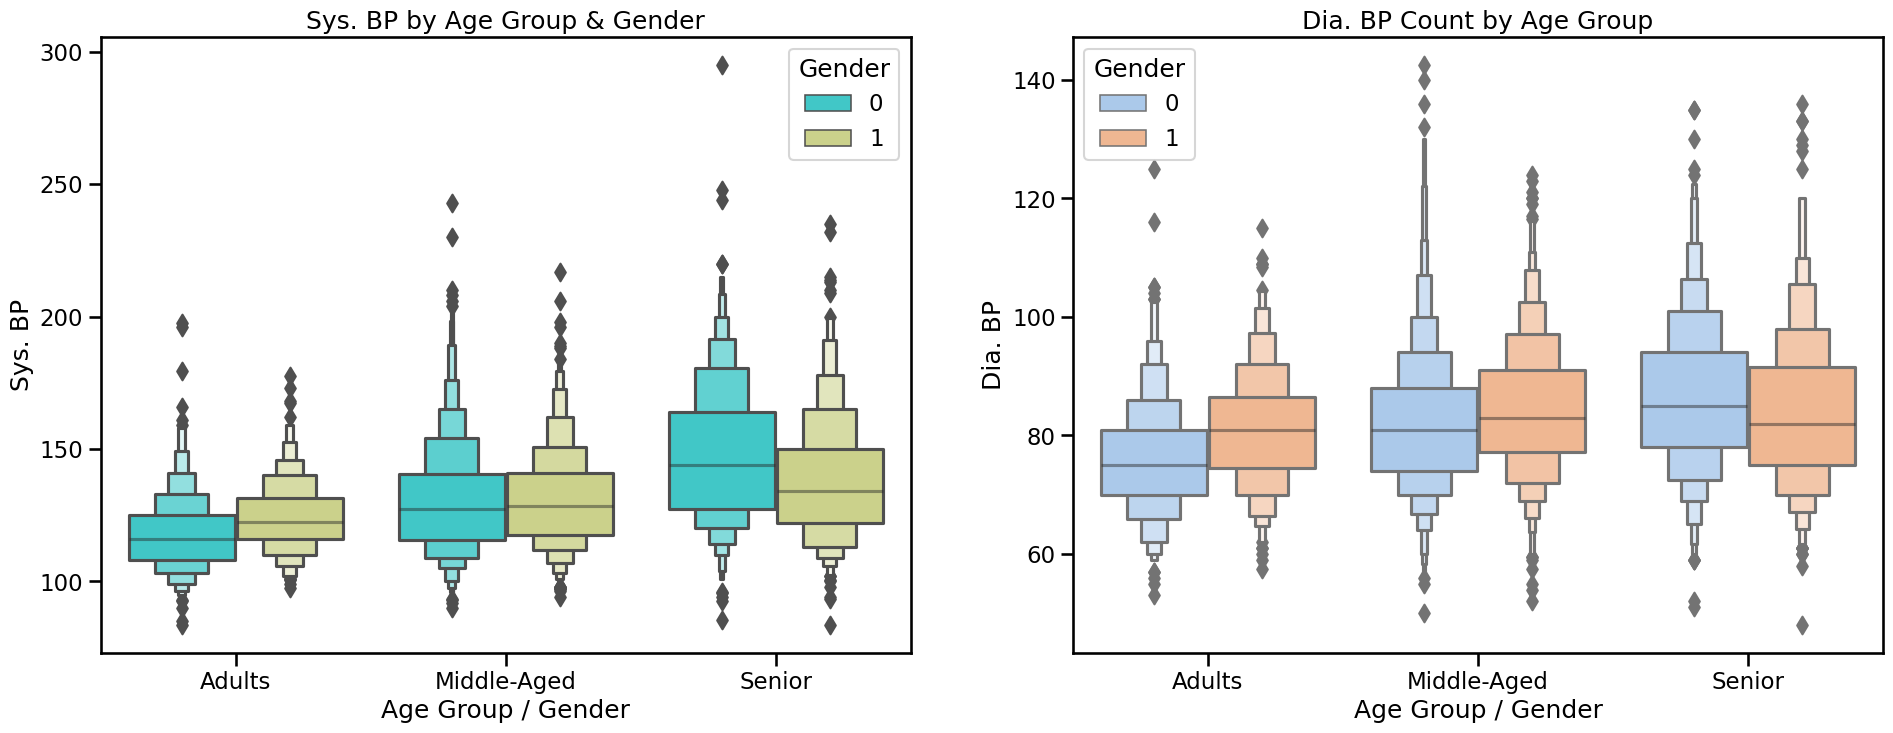

In [ ]:
#Multivariate Analysis

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='male', data=df, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='male', data=df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP Count by Age Group')
plt.legend(title='Gender')


We can boserve the systolic blood pressure for each age group. The median systolic blood pressure increases with age, for both men and women. For example, the median systolic blood pressure for men aged 40-49 years is 110 mmHg, while the median systolic blood pressure for men aged 70-79 years is 130 mmHg. A similar trend can be seen for women.

It is also to be noted that men have higher systolic blood pressure than women, on average. For example, the median systolic blood pressure for men aged 60-69 years is 130 mmHg, while the median systolic blood pressure for women aged 60-69 years is 120 mmHg.

In conclusion, the systolic blood pressure (BP) distribution by age group and gender. The x-axis shows the age group, and the y-axis shows the systolic blood pressure. The graph shows that systolic blood pressure increases with age, with older adults having higher systolic blood pressure than younger adults. The graph also shows that men have higher systolic blood pressure than women, on average. This means that the prevalence of diabetes increases with age and that men have a higher prevalence of diabetes than women, on average.

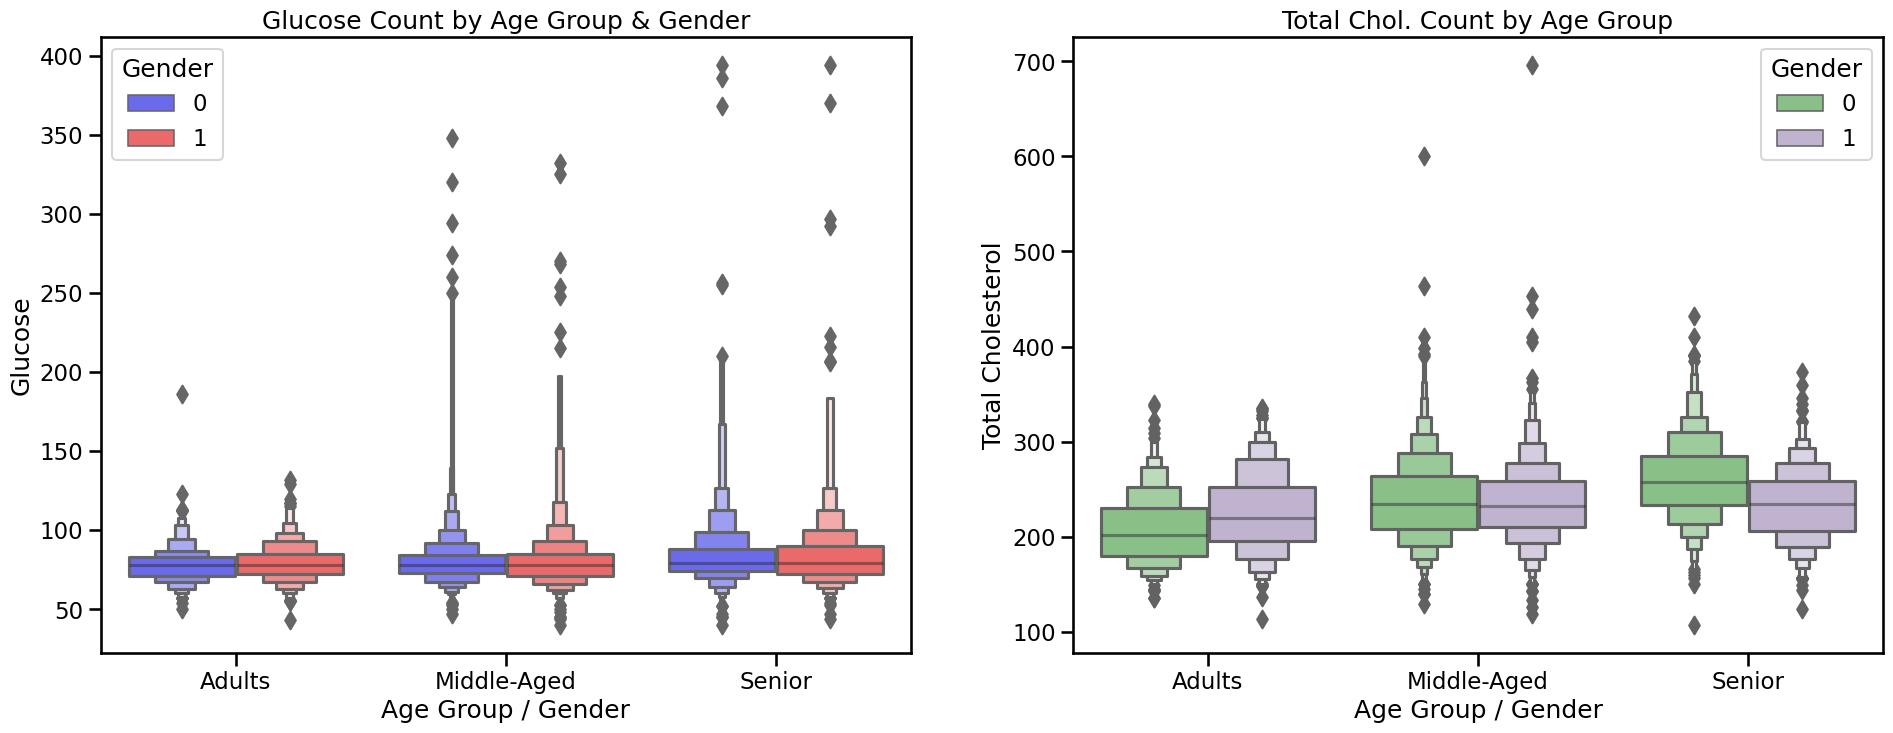

In [ ]:
#Multivariate Analysis

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='glucose', hue='male', data=df, palette='seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='totChol', hue='male', data=df, palette='Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

- Glucose Count by Age Group \& Gender: A noticeable trend emerges as age increases, indicating a corresponding increase in the count of glucose levels. When examining gender-specific distributions, the median glucose count appears quite similar, with a few outliers present in each gender group.
- Total Cholesterol by Age Group \& Gender: After excluding outliers, a distinct pattern emerges in the relationship between age, gender, and total cholesterol levels. For females, there is a discernible increase in cholesterol levels with age, as evidenced by the quantile values (25\%, 50\%, 75\%). On the other hand, for males, the quantile values for cholesterol levels remain relatively consistent across different age groups, indicating a more stable cholesterol distribution compared to females.

Text(0.5, 1.0, 'Cigs. per day by Age Group')

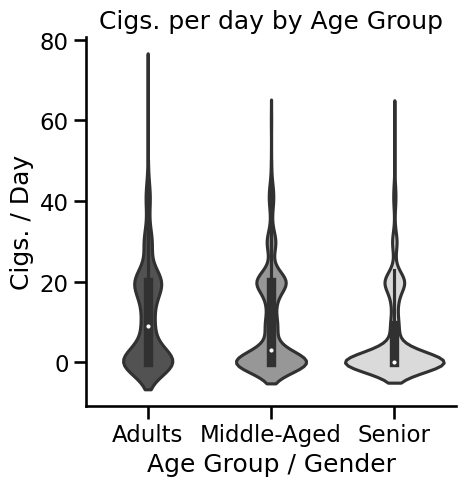

In [ ]:
# Violin Plot of Cigsperday by age group

sns.catplot(data=df, x='encode_age', y='cigsPerDay', kind='violin', size=7, palette='Greys_r')
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per day by Age Group')


- Adults: Within the adult age group, it is evident that the median values exhibit a lower kernel density, followed by the 75\% interquartile range's (IQR) density. Conversely, the 25\% IQR marks the higher kernel density, indicating a specific distribution pattern in this age category.
- Middle-Aged: Notably, in the middle-aged group, there is a distinct distribution pattern. The 25\% IQR and median show higher kernel density, while the 75\% IQR exhibits a relatively lower kernel density. This suggests a unique density distribution among the quartiles within the middle-aged demographic.
- Senior: Examining the senior age group, a distinctive pattern emerges. The median and 25\% IQR closely align with each other, displaying higher kernel density. In contrast, the 75\% IQR demonstrates a lower kernel density, providing insights into the density distribution within the senior population.

Text(0.5, 1.0, 'Diabetes by Age Group')

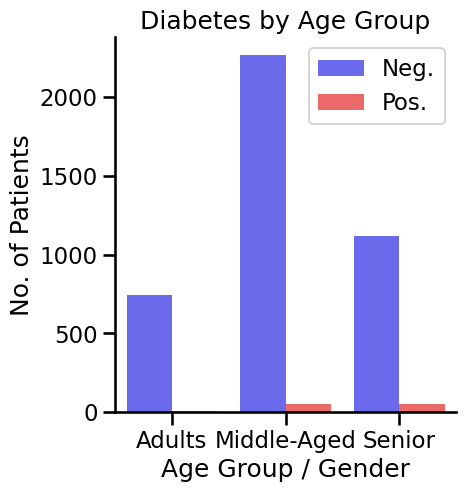

In [ ]:
#Diabetes by Age Group

sns.catplot(x='encode_age', hue='diabetes', data=df, kind='count', palette='seismic', legend=False)
plt.xlabel('Age Group / Gender')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes by Age Group')


- Adults: Among the adult population, the count of subjects with a negative diagnosis for diabetes is approximately 800, whereas the count of those with a positive diabetes diagnosis is negligible, almost non-existent.
- Middle-Aged: In the middle-aged demographic, subjects with a negative diabetes diagnosis reach a peak at around 2500, while the count of those with a positive diabetes diagnosis is below 100.
- Senior: Within the senior age group, the count of subjects with a negative diabetes diagnosis is approximately 1000, while the count of those with a positive diagnosis is under 100.

Text(0.5, 1.0, 'Target Class Count')

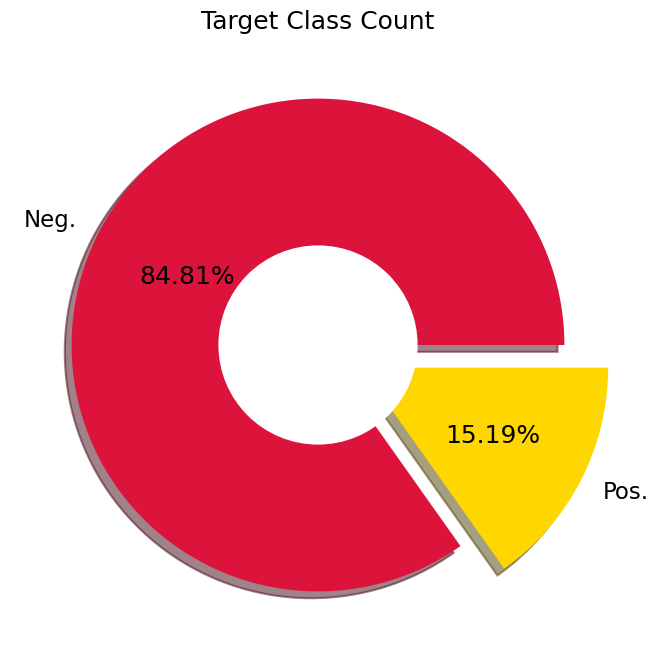

In [ ]:
#Target Class count

plt.figure(figsize=(8,8))
plt.pie(df['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

In [ ]:
#Making a copy of Dataset

df_copy = df.copy()


In [ ]:
#Reading data

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,encode_age
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,1
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,2
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,1


In [ ]:
#Log Transform Continuous Variables

df_copy['log_cigsPerDay'] = np.log1p(df_copy['cigsPerDay'])
df_copy['log_totChol'] = np.log1p(df_copy['totChol'])
#df_copy['log_sysBP'] = np.log1p(df_copy['sysBP'])
df_copy['log_diaBP'] = np.log1p(df_copy['diaBP'])
df_copy['log_BMI'] = np.log1p(df_copy['BMI'])
df_copy['log_heartRate'] = np.log1p(df_copy['heartRate'])
df_copy['log_glucose'] = np.log1p(df_copy['glucose'])
df_copy['log_age'] = np.log1p(df_copy['age'])

df_copy.drop(['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'age',
              'currentSmoker', 'education', 'enc_hr', 'encode_age'], axis=1, inplace=True)

In [ ]:
#Normalizing dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df_copy.drop(['TenYearCHD'], axis=1).columns

norm_df = scaler.fit_transform(df_copy.drop(['TenYearCHD'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df_copy.drop(['TenYearCHD'], axis=1).index)
norm_df.head()

,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,log_cigsPerDay,log_totChol,log_diaBP,log_BMI,log_heartRate,log_glucose,log_age
0,1.153113,-0.173569,-0.077014,-0.671241,-0.162437,-0.928462,-0.958976,-1.130247,0.366175,0.417050,-0.179487,-1.296260
1,-0.867217,-0.173569,-0.077014,-0.671241,-0.162437,-0.928462,0.389489,-0.094351,0.781994,1.522102,-0.246230,-0.347297
2,1.153113,-0.173569,-0.077014,-0.671241,-0.162437,1.143043,0.279789,-0.182594,-0.042965,0.002631,-0.665854,-0.102079
3,-0.867217,-0.173569,-0.077014,1.489778,-0.162437,1.408036,-0.182514,1.039278,0.747528,-0.914968,1.308555,1.282600
4,-0.867217,-0.173569,-0.077014,-0.671241,-0.162437,1.233898,1.101174,0.164064,-0.648574,0.806637,0.325550,-0.347297


#### Building Model

In [ ]:
#train-test split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

x = norm_df
y = df_copy['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3180, 12), (1060, 12), (3180,), (1060,))

#### A. Logistic Regression

- Logistic Regression is always a best approach before moving ahead to complex Algorithms.

- Most of the times if we have done good Feature Engineering then algorithms as simple as Logistics Regression can give us fairly acceptable results.

- We will choose our solver as "liblinear" because our dataset isn't big to try other solvers so we'll go ahead with "liblinear"

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train, y_train)

log_pred = log_reg.predict(x_test)
log_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy Score : 0.8603773584905661
Cross Validation Score :  0.8484276729559749
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.83      0.03      0.06       152

    accuracy                           0.86      1060
   macro avg       0.85      0.52      0.49      1060
weighted avg       0.86      0.86      0.80      1060



<Axes: >

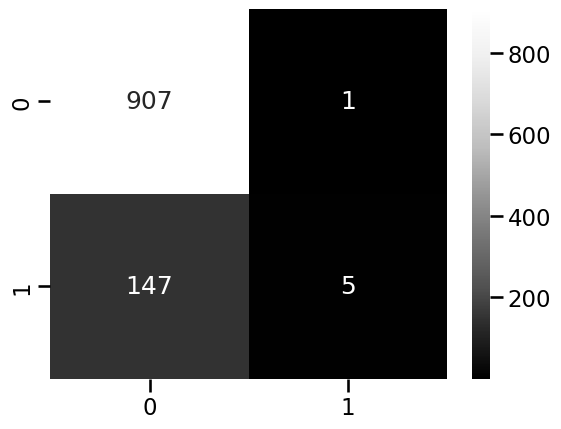

In [ ]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_pred))
print ('Cross Validation Score : ', cross_val_score(log_reg, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_pred))

sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='Greys_r', fmt='d')

**Understanding the Metrics :**

- **Accuracy Score** : Accuracy Score in Imbalanced Dataset can be a Trap.
    
    - **Why Accuracy is not our Evaluation Metrics ?**
    - **Ans.:** We get illusion of High Accuracy because our Estimator Learns well from Majority Class and is able to Predict well on Majority Class but not Minority Class leaving us in an illusion of High Accuracy. 0.8603 seems like a good accuracy but it has no value Since we can observe (Refer Confusion Matrix) above that we've Misclassification happening here for Minority Class.


- **Cross-Val Score** : Cross-Validation Scores uses the average of the output, which will be affected by the number of folds. Cross-Validation Scores Help us Identify if our Model is Over / Under-fitting.


- **Classification Report** : In Classification Report our Important metrics is Precision (TP/TP + FP) & Recall (TP/TP + FN). We can see our Recall Scores is good only for Majority Class but Positive Class has Bad Recall Score.


- **Confusion Matrix** : Diagonal Values of Confusion Matrix are correct. So we can see that In Negative Diagnosis out of 908 the 907 are correctly Classified while only 1 is misclassified, we can also call it as **Type 1 Error**. While, In case of Positive Diagnosis out of 152 examples, 5 are Classified correctly while rest 147 are misclassified as Negative Class. (Below is Interpretation of Confusion Matrix).

![alt text](https://blog.exsilio.com/wp-content/uploads/2016/09/table-blog.png)<br>


- **Let us add Class Weight Parameter to our Logistic Regression Estimator and see if it makes any Difference**

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

log_reg_cw = LogisticRegression(solver='liblinear', class_weight='balanced')
log_reg_cw.fit(x_train, y_train)

log_cw_pred = log_reg_cw.predict(x_test)
log_cw_pred

array([1, 1, 0, ..., 0, 1, 0])

Accuracy Score : 0.6443396226415095
Cross Validation Score :  0.6490566037735849
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       908
           1       0.24      0.71      0.36       152

    accuracy                           0.64      1060
   macro avg       0.59      0.67      0.56      1060
weighted avg       0.83      0.64      0.70      1060



<Axes: >

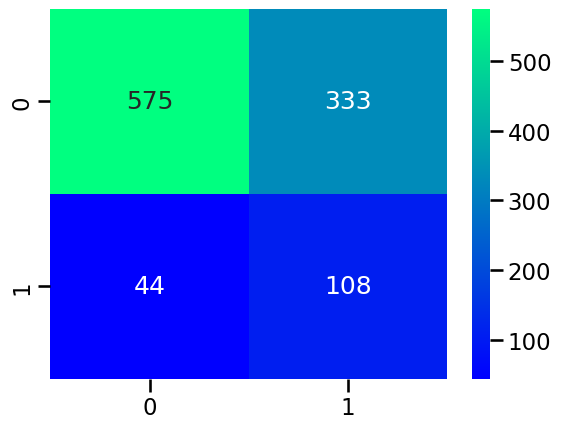

In [ ]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_cw_pred))
print ('Cross Validation Score : ', cross_val_score(log_reg_cw, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_cw_pred))

sns.heatmap(confusion_matrix(y_test, log_cw_pred), annot=True, cmap='winter', fmt='d')

**Understanding the Metrics :**

- By adding Class Weight Parameter to our Estimator we've got good Recall Score.


- Also, we can Interpret Confusion Matrix above, Its observable that for Negative Class 575 are Classified Correct & 333 are misclassified. While for Positive Class 108 are Classified correct and 44 are misclassified, It is a better result than our previous prediction. **Type 2 Error** has reduced upto some extent. Type 2 Errors in our case can be threatening. Let me explain how.


- **If Positive Class , i.e, One who actually has CHD is Classified as Negative Class then its a real threat as no actions will be taken on the Subject. It is termed as Type 2 Error. So such Model cannot be deployed in Production.**


- Let us Proceed ahead with Over-Sampling and examine our Metrics.

### Over-Sampling using SMOTE
- SMOTE creates synthetic observations based upon the existing - minority observations.

- SMOTE is widely used by Data Science Practioners.

In [ ]:
#Applying SMOTE

from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE

smote = SMOTE(sampling_strategy='not majority')
x_s_res, y_s_res = smote.fit_resample(x_train, y_train)

print (y_train.value_counts(), '\n')
np.bincount(y_s_res)

0    2688
1     492
Name: TenYearCHD, dtype: int64 



array([2688, 2688])

- Above we've used imblearn's SMOTE which is easiest to implement.

- We're using sampling strategy as "not majority", it is similar to Minority Over-sampling.

- Post-Application we can validate that SMOTE was successful and we've 2688 examples now of each class.

### Logistic Regression Post Over-Sampling

Let's implement Logistic Regression Again and Interpret our Results.

In [ ]:
est_reg = LogisticRegression(solver='liblinear', max_iter=1000, C=1).fit(x_s_res, y_s_res)
est_pred = est_reg.predict(x_test)
est_pred

array([1, 1, 0, ..., 0, 1, 0])

Accuracy Score : 0.6518867924528302
Cross Validation Score :  0.6707599204633872
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       908
           1       0.25      0.70      0.37       152

    accuracy                           0.65      1060
   macro avg       0.59      0.67      0.56      1060
weighted avg       0.83      0.65      0.70      1060



<Axes: >

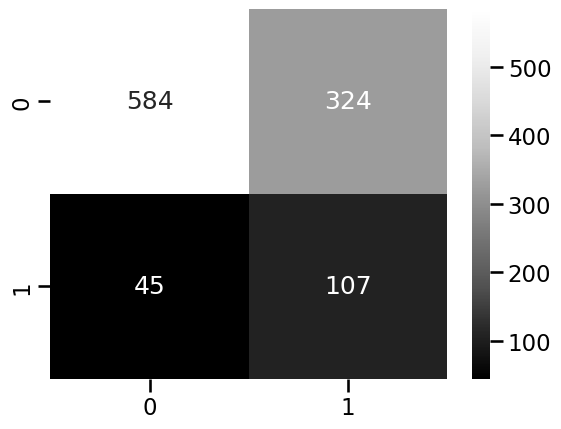

In [ ]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, est_pred))
print ('Cross Validation Score : ', cross_val_score(est_reg, x_s_res, y_s_res, cv=5).mean())
print (classification_report(y_test, est_pred))

sns.heatmap(confusion_matrix(y_test, est_pred), annot=True, cmap='Greys_r', fmt='d')

**Understanding the Metrics :**

- From Confusion Matrix above, Its observable that for Negative Class 581 are Classified Correct & 327 are misclassified. While for Positive Class 108 are Classified correct and 44 are misclassified, It is a better result than our previous prediction in case of Type 1 Error has reduced upto some extent. Type 2 Errors remains similar.

- Type 2 Error : If Positive Class , i.e, One who actually has CHD is Classified as Negative Class then its a real threat as no actions will be taken on the Subject. It is termed as Type 2 Error. So such Model cannot be deployed in Production.

### ROC-AUC (Receiver Operating Characteristics - Area Under Curve)
- t is a performance measurement for classification problem.

- ROC is a probability curve and AUC represents degree or measure of separability.

- It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

- By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

- The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

Text(0.5, 1.0, 'Receiver operating characteristic - Area Under Curve (ROC-AUC)')

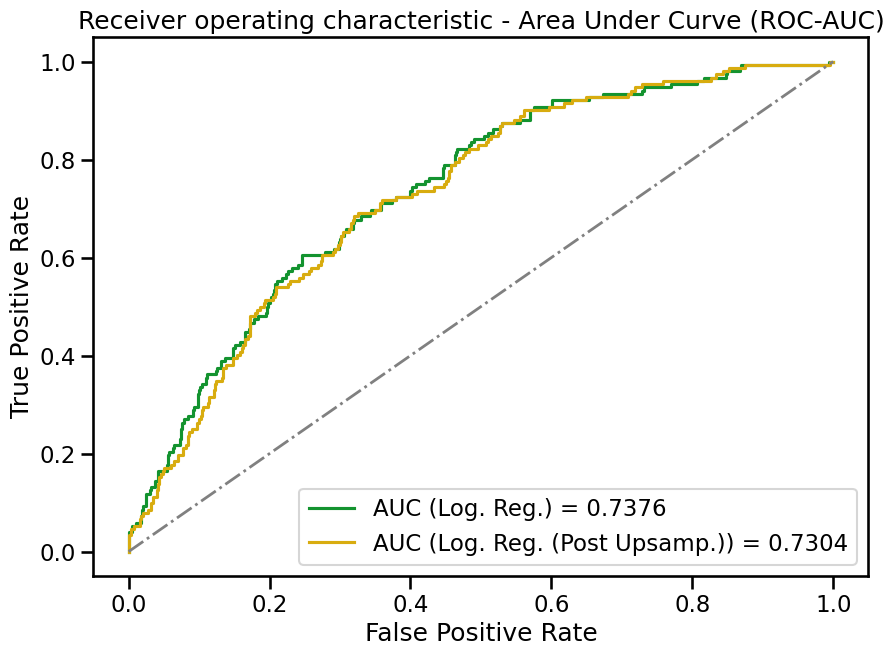

In [ ]:
#Roc-Auc

from sklearn.metrics import auc, roc_auc_score, roc_curve

#log_prob = log_reg.predict_proba(x_test)
log_prob_cw = log_reg_cw.predict_proba(x_test)
log_prob_up = est_reg.predict_proba(x_test)

#fpr, tpr, _ = roc_curve(y_test, log_prob[:,1])
fpr_cw, tpr_cw, _ = roc_curve(y_test, log_prob_cw[:,1])
fpr_up, tpr_up, _ = roc_curve(y_test, log_prob_up[:,1])

#log_roc_auc = auc(fpr, tpr)
log_cw_roc_auc = auc(fpr_cw, tpr_cw)
log_up_roc_auc = auc(fpr_up, tpr_up)

plt.figure(figsize=(10,7))

#plt.plot(fpr, tpr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_roc_auc)
plt.plot(fpr_cw, tpr_cw, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_cw_roc_auc)
plt.plot(fpr_up, tpr_up, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg. (Post Upsamp.)) = %0.4f'% log_up_roc_auc)

plt.plot([0,1], 'grey', lw=2, linestyle='-.')

plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic - Area Under Curve (ROC-AUC)')

**Observations :**

- Above we've plotted ROC-AUC for 2 models.

- As mentioned above, the more the ROC-AUC Score the better is the model.

- We can evaluate Models performance based on this. It's clear that Logistic Regression model with Class Weight as "balanced" is giving us decent Score of 0.7376 followed by Logistic Regression post Over-Sampling which has given us Score of 0.7369.

### Conclusion :
- We figured out how our dataset was suffering from Class imbalance & so We handled imbalanced dataset with the help of SMOTE.

- From business perspective , it can help doctors to take necessary measures for patients carrying high risk of heart disease.

- This can also benefit Insurance Companies to some extent, If effective measures are taken then the number of claims can be reduced.

### Future Work:
- We can also try to add more Parameters for Tuning the model.

- One can also try to fill missing values by forward / backward fill.

- One can try also implement Ensemble method, Tree Algorithm and / or Deep Neural Network Modelling.

#### B. KNN

In [ ]:
# train a kNN model on the training set
from sklearn.neighbors import KNeighborsClassifier

model_KN = KNeighborsClassifier(n_neighbors=10)
model_KN.fit(x_train, y_train)

modelKN_pred = model_KN.predict(x_test)
modelKN_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy Score : 0.8556603773584905
Cross Validation Score :  0.8418238993710692
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.33      0.01      0.01       152

    accuracy                           0.86      1060
   macro avg       0.60      0.50      0.47      1060
weighted avg       0.78      0.86      0.79      1060



<Axes: >

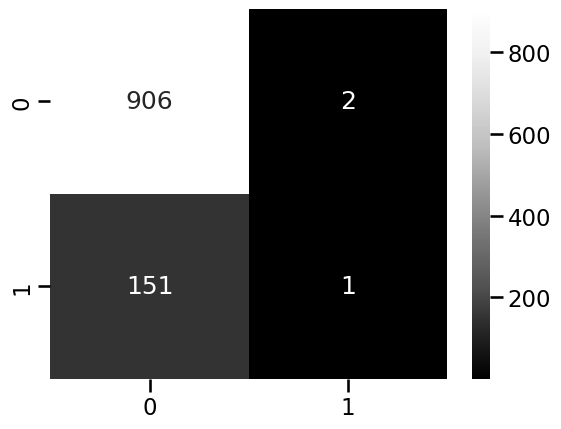

In [ ]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, modelKN_pred))
print ('Cross Validation Score : ', cross_val_score(model_KN, x_train, y_train, cv=5).mean())
print (classification_report(y_test, modelKN_pred))

sns.heatmap(confusion_matrix(y_test, modelKN_pred), annot=True, cmap='Greys_r', fmt='d')

#### C. Decision Tree

In [ ]:
# train a decision tree model on the training set
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(x_train, y_train)

modelDT_pred = model_DT.predict(x_test)
modelDT_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy Score : 0.7716981132075472
Cross Validation Score :  0.761006289308176
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       908
           1       0.26      0.32      0.28       152

    accuracy                           0.77      1060
   macro avg       0.57      0.58      0.57      1060
weighted avg       0.79      0.77      0.78      1060



<Axes: >

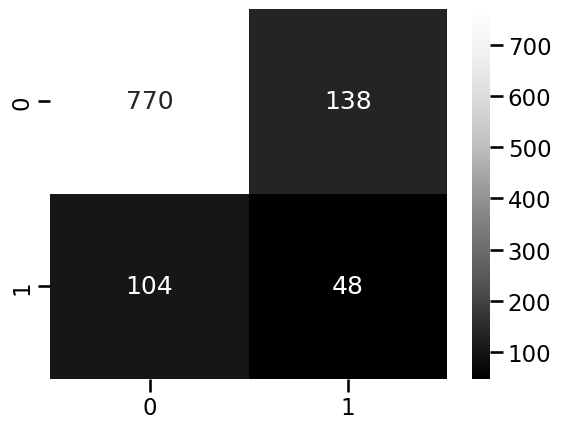

In [ ]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, modelDT_pred))
print ('Cross Validation Score : ', cross_val_score(model_DT, x_train, y_train, cv=5).mean())
print (classification_report(y_test, modelDT_pred))

sns.heatmap(confusion_matrix(y_test, modelDT_pred), annot=True, cmap='Greys_r', fmt='d')

#### D. SVM

In [ ]:
# train a Support Vector Machine model on the training set
from sklearn import svm

model_svm = svm.SVC(kernel='linear')
model_svm.fit(x_train, y_train)

modelSVM_pred = model_svm.predict(x_test)
modelSVM_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy Score : 0.8566037735849057
Cross Validation Score :  0.8452830188679246
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.00      0.00      0.00       152

    accuracy                           0.86      1060
   macro avg       0.43      0.50      0.46      1060
weighted avg       0.73      0.86      0.79      1060



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

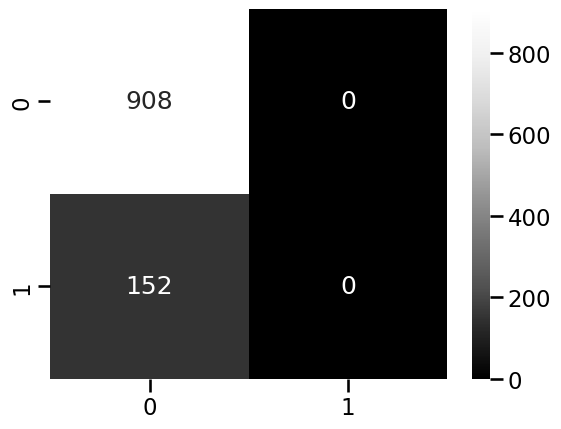

In [ ]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, modelSVM_pred))
print ('Cross Validation Score : ', cross_val_score(model_svm, x_train, y_train, cv=5).mean())
print (classification_report(y_test, modelSVM_pred))

sns.heatmap(confusion_matrix(y_test, modelSVM_pred), annot=True, cmap='Greys_r', fmt='d')

#### E. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=10, random_state=42)
model_RF.fit(x_train, y_train)

modelRF_pred = model_RF.predict(x_test)
modelRF_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy Score : 0.8433962264150944
Cross Validation Score :  0.828616352201258
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       908
           1       0.32      0.08      0.13       152

    accuracy                           0.84      1060
   macro avg       0.59      0.53      0.52      1060
weighted avg       0.78      0.84      0.80      1060



<Axes: >

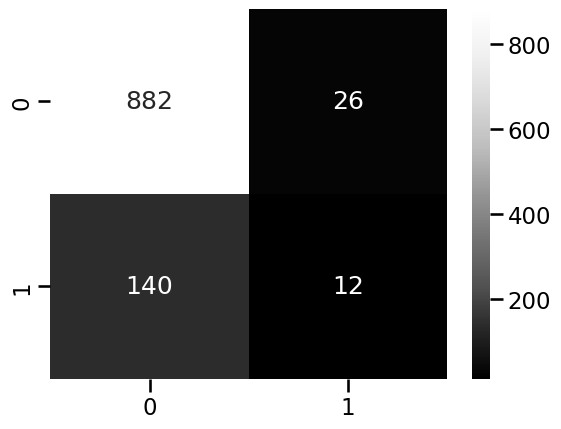

In [ ]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, modelRF_pred))
print ('Cross Validation Score : ', cross_val_score(model_RF, x_train, y_train, cv=5).mean())
print (classification_report(y_test, modelRF_pred))

sns.heatmap(confusion_matrix(y_test, modelRF_pred), annot=True, cmap='Greys_r', fmt='d')

#### Classification Model Comparision

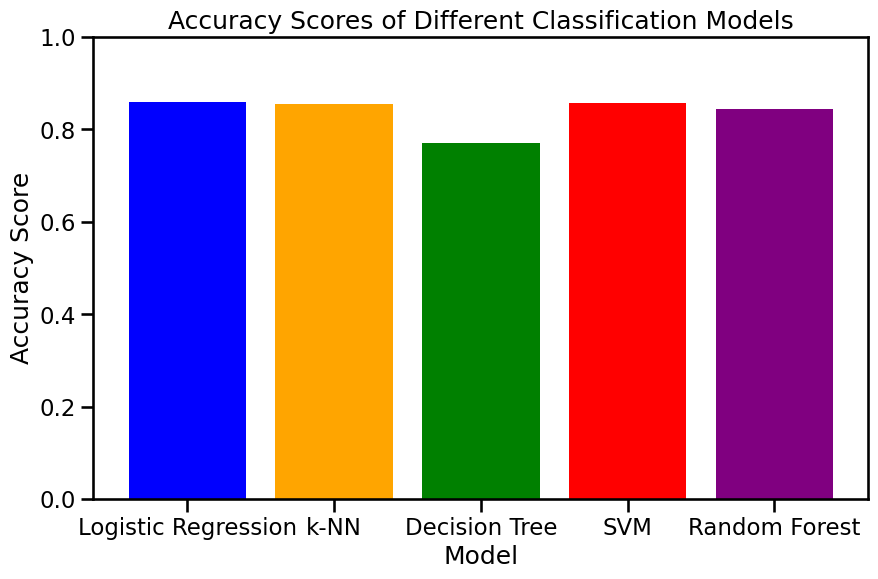

In [ ]:
import matplotlib.pyplot as plt

# List of model names and their corresponding predictions
model_names = ['Logistic Regression', 'k-NN', 'Decision Tree', 'SVM', 'Random Forest']
predictions = [log_pred, modelKN_pred, modelDT_pred, modelSVM_pred, modelRF_pred]

# List to store accuracy scores
accuracy_scores = []

# Calculate accuracy scores for each model
for pred in predictions:
    accuracy_scores.append(accuracy_score(y_test, pred))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Accuracy Scores of Different Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit to the range of [0, 1]
plt.show()

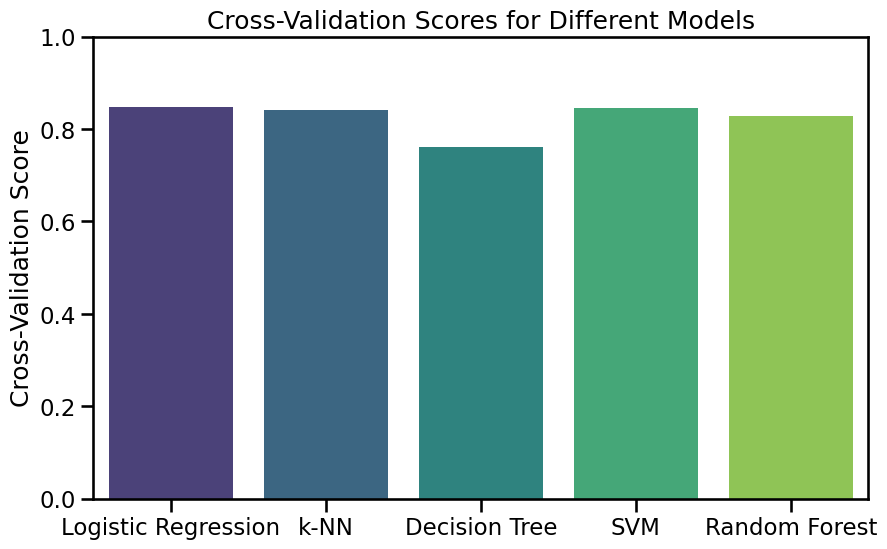

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# List of models and their names
models = [log_reg, model_KN, model_DT, model_svm, model_RF]
model_names = ['Logistic Regression', 'k-NN', 'Decision Tree', 'SVM', 'Random Forest']

# Lists to store cross-validation scores for each model
cv_scores = []

# Calculate cross-validation scores for each model
for model in models:
    scores = cross_val_score(model, x_train, y_train, cv=5)
    cv_scores.append(scores.mean())

# Create a bar plot to visualize cross-validation scores
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=cv_scores, palette='viridis')
plt.title('Cross-Validation Scores for Different Models')
plt.ylim(0, 1)  # Set y-axis limit to match the accuracy scale (0 to 1)
plt.ylabel('Cross-Validation Score')
plt.show()


#### Prediction

In [ ]:
y_train.iloc[1]

0

In [ ]:
x_train.iloc[1]

male              -0.867217
BPMeds            -0.173569
prevalentStroke   -0.077014
prevalentHyp      -0.671241
diabetes          -0.162437
log_cigsPerDay    -0.928462
log_totChol        2.011938
log_diaBP         -0.227125
log_BMI           -0.657061
log_heartRate     -0.625846
log_glucose       -0.179487
log_age           -1.296260
Name: 3104, dtype: float64

In [ ]:
# Assuming 'new_data' is a new data point or a set of data points
new_data = x_train.iloc[1]  # Adjust this line based on the data you want to predict

# Reshape the data into a 2D array
new_data_reshaped = new_data.values.reshape(1, -1)

# Make predictions on the new data
new_predictions = log_reg.predict(new_data_reshaped)
print("New Predictions:", new_predictions)


New Predictions: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### **2. Diabetes Aanalysis**

The aim of this analysis is to investigate a range of health-related factors and their interconnections to classify diabetes accurately. These factors include aspects such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This comprehensive examination will not only provide insights into the patterns and trends in diabetes risk but will also create a solid base for further research. Specifically, research can be built on how these variables interact and influence diabetes occurrence and progression, crucial knowledge for improving patient care and outcomes in this increasingly critical area of healthcare.

- Age: Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.
- Gender: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.
- Body Mass Index (BMI): BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can lead to insulin resistance and impair the body's ability to regulate blood sugar levels.
- Hypertension: Hypertension, or high blood pressure, is a condition that often coexists with diabetes. The two conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes and vice versa. Both conditions can have detrimental effects on cardiovascular health.
- Heart Disease: Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes. The relationship between heart disease and diabetes is bidirectional, meaning that having one condition increases the risk of developing the other. This is because they share many common risk factors, such as obesity, high blood pressure, and high cholesterol.
- Smoking History: Smoking is a modifiable risk factor for diabetes. Cigarette smoking has been found to increase the risk of developing type 2 diabetes. Smoking can contribute to insulin resistance and impair glucose metabolism. Quitting smoking can significantly reduce the risk of developing diabetes and its complications.
- HbA1c Level: HbA1c (glycated hemoglobin) is a measure of the average blood glucose level over the past 2-3 months. It provides information about long-term blood sugar control. Higher HbA1c levels indicate poorer glycemic control and are associated with an increased risk of developing diabetes and its complications.
- Blood Glucose Level: Blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time. Elevated blood glucose levels, particularly in the fasting state or after consuming carbohydrates, can indicate impaired glucose regulation and increase the risk of developing diabetes. Regular monitoring of blood glucose levels is important in the diagnosis and management of diabetes.

#### Loading Data

In [ ]:
# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

In [ ]:
df_1 = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [ ]:
df_1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.00,0,0,No Info,27.32,6.20,90,0
99996,Female,2.00,0,0,No Info,17.37,6.50,100,0
99997,Male,66.00,0,0,former,27.83,5.70,155,0
99998,Female,24.00,0,0,never,35.42,4.00,100,0


#### Data Cleansing

In [ ]:
# Handle duplicates
duplicate_rows_data = df_1[df_1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [ ]:
df_1 = df_1.drop_duplicates()

In [ ]:
df_1.shape

(96146, 9)

In [ ]:
# Loop through each column and count the number of distinct values
for column in df_1.columns:
    num_distinct_values = len(df_1[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [ ]:
# Checking null values
print(df_1.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Remove Unneccessary value [0.00195%]
df_1 = df_1[df_1['gender'] != 'Other']

#### EDA

In [ ]:
df_1.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


The dataset encompasses health-related information, including age, hypertension, heart disease, body mass index (BMI), HbA1c level, blood glucose level, and diabetes status. Notable statistics reveal a diverse age distribution with a mean of 41.80 years and a standard deviation of 22.46 years. The prevalence of hypertension and heart disease is relatively low, with means of 0.08 and 0.04, respectively. BMI exhibits a mean of 27.32 and a standard deviation of 6.77, with a wide range from 10.01 to 95.69. HbA1c levels and blood glucose levels display means of 5.53 and 138.22, respectively, showcasing variations in metabolic markers. The incidence of diabetes, with a mean of 0.09, indicates a relatively low prevalence in the dataset. These insights offer a comprehensive overview of the health characteristics, emphasizing the importance of considering factors such as age, BMI, and metabolic markers in the analysis of health-related datasets.

##### Univariate Analysis

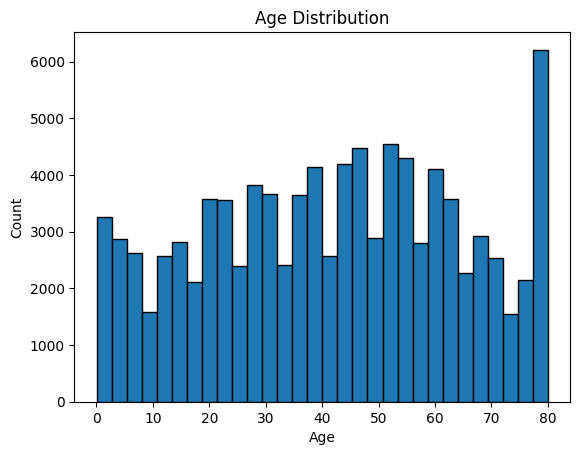

In [ ]:
# Histogram for age
plt.hist(df_1['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

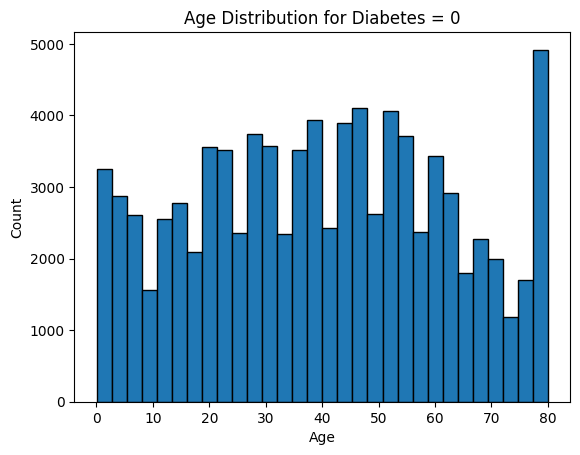

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
filtered_df = df_1[df_1['diabetes'] == 0]

plt.hist(filtered_df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution for Diabetes = 0')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


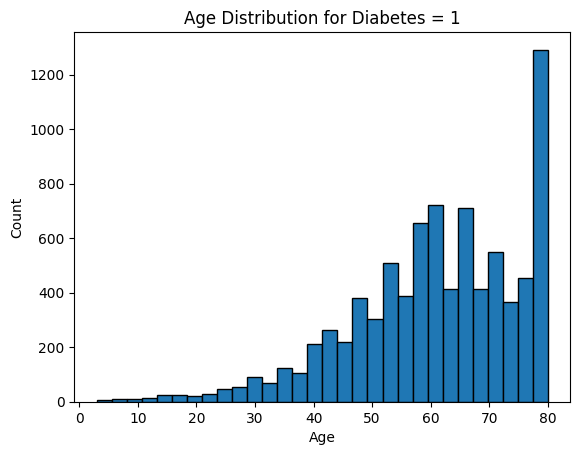

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
filtered_df = df_1[df_1['diabetes'] == 1]

plt.hist(filtered_df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution for Diabetes = 1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


The analysis of age within the dataset reveals a diverse distribution, with a mean age of 41.80 years and a notable standard deviation of 22.46 years, reflecting a wide range of ages. The age range spans from a minimum of 0.08 years to a maximum of 80.00 years, underlining the dataset's inclusivity across the lifespan. Quartile analysis indicates that 50\% of the individuals fall between the ages of 24.00 and 59.00 years, emphasizing a concentration of observations in the middle-aged range. This age-centric exploration provides valuable insights into the demographic composition of the dataset, highlighting its suitability for examining health-related trends and conditions across different life stages.

The presented graph offers a comprehensive overview of the age distribution within the diabetes dataset, encompassing individuals spanning an age range from 10 to 80 years. The visualization serves as a fundamental representation of the dataset's demographic composition, providing a glimpse into the distribution of ages among the studied population.

Examining it in more detail, it specifically focuses on the age distribution within the diabetes dataset when diabetes is not present. This nuanced perspective offers valuable insights into the prevalence of ages among individuals without diabetes, contributing to a more refined understanding of the dataset's composition and the distribution of age groups in this particular health context.

Moreover, a discernible linear increase in the graph. This trend signifies that, as age advances within the dataset, there is a corresponding upward trajectory in the likelihood of individuals developing diabetes. This crucial insight highlights the relationship between age and diabetes incidence, emphasizing the importance of age as a contributing factor in understanding the health dynamics within the dataset.


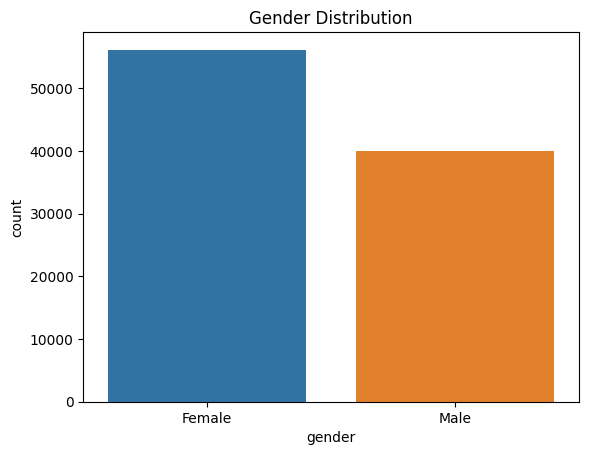

In [ ]:
# Bar plot for gender
sns.countplot(x='gender', data=df_1)
plt.title('Gender Distribution')
plt.show()

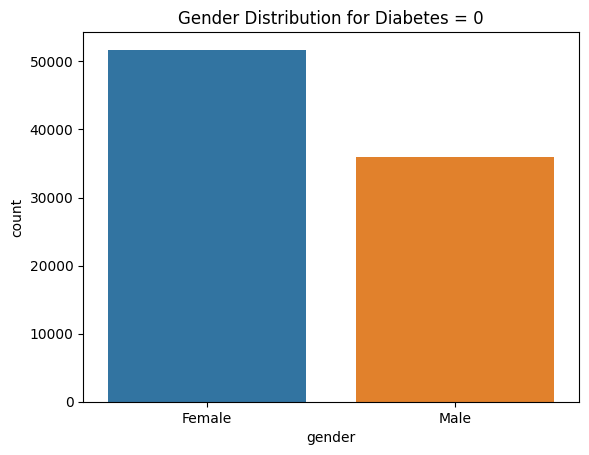

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
filtered_df = df_1[df_1['diabetes'] == 0]

sns.countplot(x='gender', data=filtered_df)
plt.title('Gender Distribution for Diabetes = 0')
plt.show()


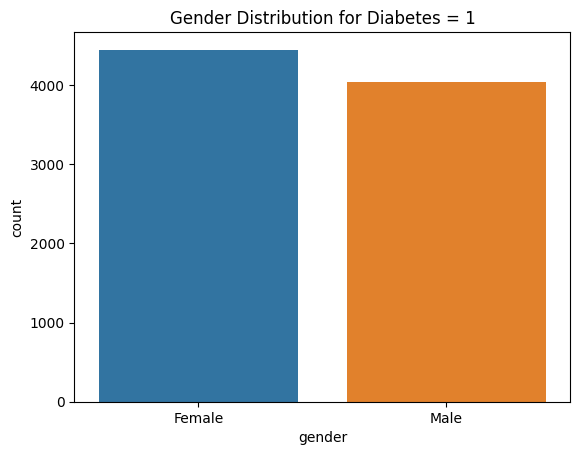

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
filtered_df = df_1[df_1['diabetes'] == 1]

sns.countplot(x='gender', data=filtered_df)
plt.title('Gender Distribution for Diabetes = 1')
plt.show()


The provided plot offers a visual representation of the gender distribution within the diabetes dataset, encompassing both male and female individuals. Notably, the data highlights a clear disparity, indicating that females constitute a larger portion, accounting for approximately 60% of the dataset, while males make up the remaining 40\%.

Upon closer examination , it specifically illustrates the gender distribution within the diabetes dataset when diabetes is absent. This nuanced perspective adds a layer of detail to our understanding of the dataset, shedding light on the distribution of genders among individuals without diabetes and contributing to a more comprehensive demographic analysis.

Furthermore, the plot delves into the gender distribution within the diabetes dataset when diabetes is present. Remarkably, the data suggests a noteworthy observation: an increased likelihood of males having diabetes. This insight is derived from both the total count of individuals and the proportion of those with diabetes, indicating that males exhibit a higher prevalence of diabetes compared to females within the dataset. This nuanced analysis enriches our understanding of the gender dynamics in relation to diabetes incidence, emphasizing the potential gender-specific aspects of this health condition within the studied population.

<ipython-input-17-62666f4820bc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['bmi'], bins=30)


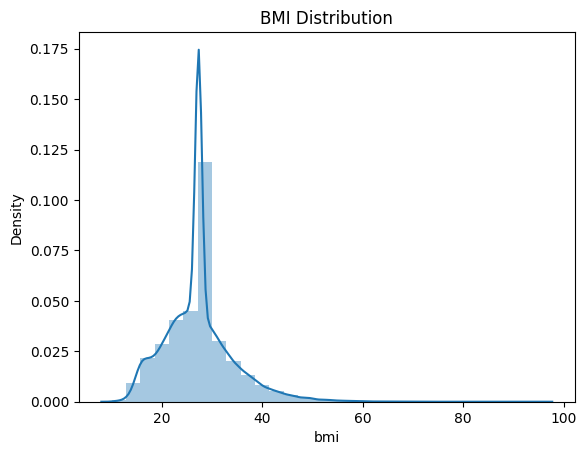

In [ ]:
# Distribution plot for BMI
sns.distplot(df_1['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

The analysis of Body Mass Index (BMI) within the dataset reveals a mean BMI of 27.32 with a standard deviation of 6.77, indicating a moderate level of variability in body mass across the population. The BMI range extends from a minimum of 10.01 to a maximum of 95.69, showcasing the dataset's diversity in body composition. Quartile analysis places 50\% of the individuals within the BMI range of 23.40 to 29.86, indicating a concentration of observations around the overweight to obese categories. The data suggests a range of body mass conditions, highlighting the relevance of BMI as a key anthropometric indicator in the assessment of health and potential associations with other health-related factors within the dataset.

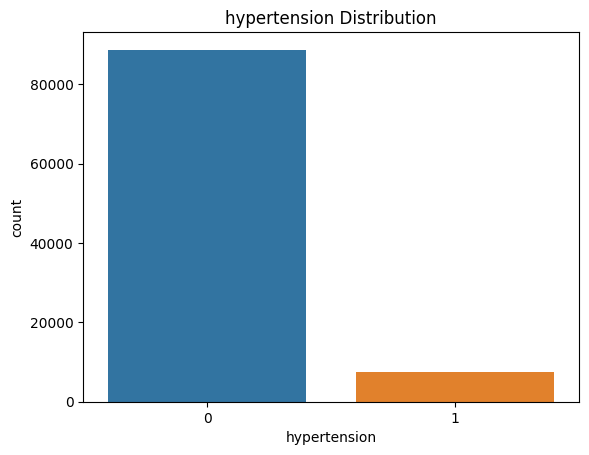

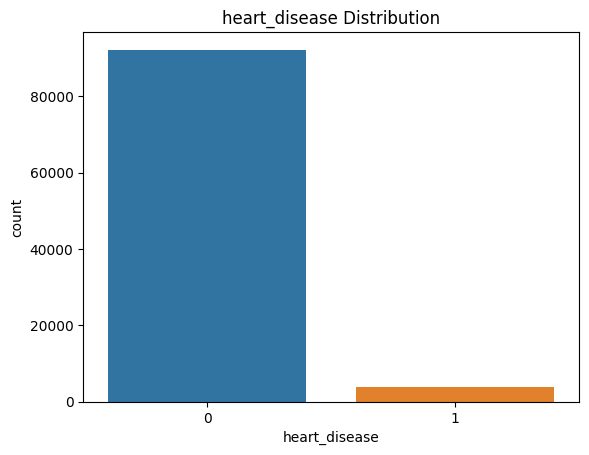

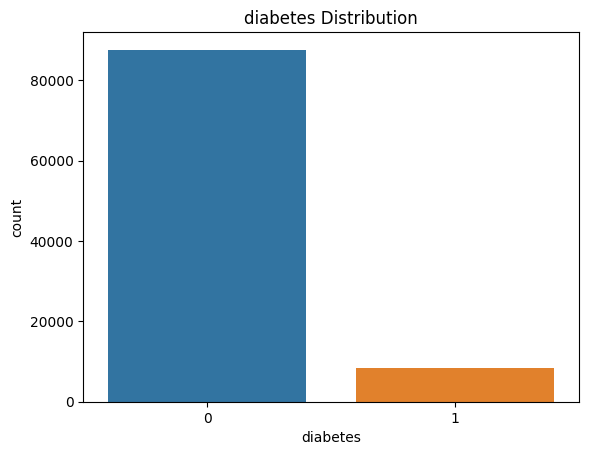

In [ ]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df_1)
    plt.title(f'{col} Distribution')
    plt.show()

- The analysis of hypertension prevalence within the dataset reveals a mean of 0.08 and a standard deviation of 0.27, indicating a relatively low overall incidence of hypertension among the population. The dataset employs binary values, with 0 denoting the absence and 1 indicating the presence of hypertension. The minimum value of 0 and the maximum value of 1 reflect the binary nature of this health indicator. Quartile analysis demonstrates that 75\% of individuals have a recorded absence of hypertension, highlighting a majority with normal blood pressure levels. This analysis provides valuable insights into the distribution of hypertension within the studied population, emphasizing the dataset's focus on individuals with varied blood pressure statuses and offering a foundation for exploring potential associations with other health-related factors.
The graph provided shows the distribution of Hypertension in the diabetes dataset for people without diabetes. The x-axis shows Hypertension, and the y-axis shows count.

- The analysis of heart disease prevalence within the dataset indicates a relatively low mean of 0.04, with a standard deviation of 0.20, suggesting a generally low incidence of heart disease among the population. The dataset comprises binary values, with 0 denoting the absence and 1 indicating the presence of heart disease. The minimum value of 0 and the maximum value of 1 illustrate the binary nature of this health indicator. Quartile analysis reveals that 75\% of individuals have a recorded absence of heart disease, reinforcing the dataset's overall trend towards a low prevalence of this cardiovascular condition. This analysis underscores the importance of examining heart disease within the dataset, providing valuable insights into the distribution of this health outcome among the studied population.
The graph shows the distribution of Heart disease in the diabetes dataset for people without diabetes. The x-axis shows Heart disease, and the y-axis shows count.


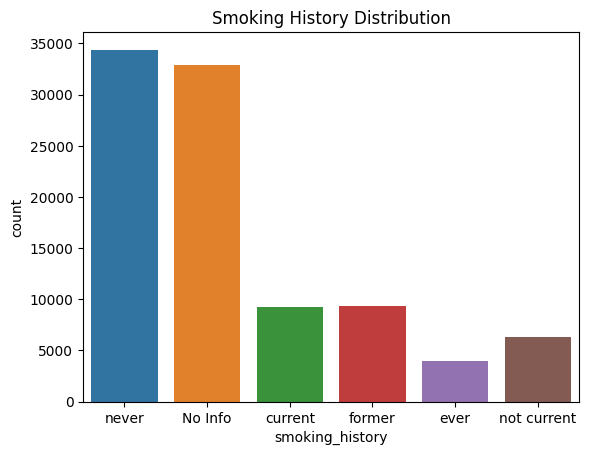

In [ ]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df_1)
plt.title('Smoking History Distribution')
plt.show()

The graph provided shows the distribution of smoking history in the diabetes dataset. The x-axis shows smoking history, and the y-axis shows count. Count is the number of people in each smoking history category.

The graph shows that the most common smoking history category is current smoker, followed by former smoker, and then never smoker. There are also a significant number of people with an unknown smoking history.

The smoking history distribution of the diabetes dataset is likely due to a number of factors, including:
- The prevalence of smoking is higher among people with diabetes than among people without diabetes.
- People with diabetes are more likely to smoke to cope with stress or other health problems.
- Smoking can worsen the symptoms of diabetes and increase the risk of complications.

It is important to note that the smoking history distribution of your diabetes dataset may not be representative of the smoking history distribution of people with diabetes in the general population. For example, your dataset may be oversampled for smokers or undersampled for never smokers.

The smoking history distribution of the diabetes dataset shows that most people with diabetes are current or former smokers. This is likely due to a number of factors, including the prevalence of smoking being higher among people with diabetes and smoking worsening the symptoms of diabetes.

##### Bivariative Analysis

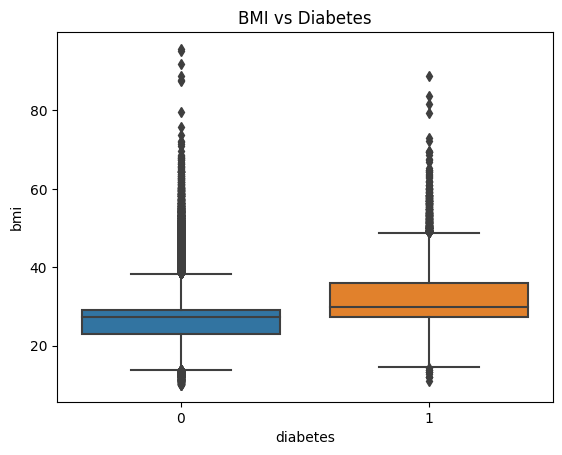

In [ ]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df_1)
plt.title('BMI vs Diabetes')
plt.show()

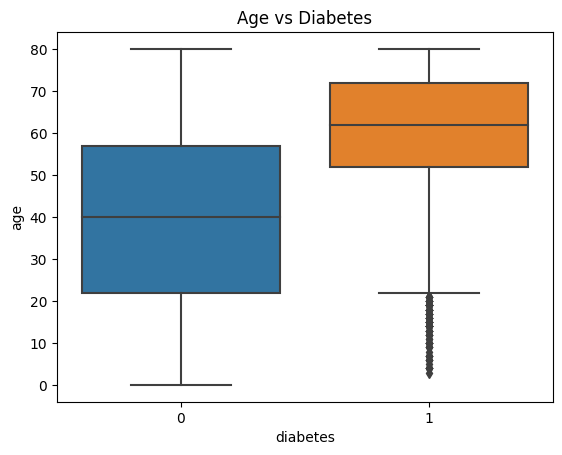

In [ ]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df_1)
plt.title('Age vs Diabetes')
plt.show()

The box and whisker plot of age versus diabetes shows that there is a positive correlation between age and diabetes, meaning that the older a person is, the more likely they are to have diabetes. This is evident by the fact that the median age of people with diabetes is higher than the median age of people without diabetes.

The box and whisker plot also shows that the age distribution of people with diabetes is more spread out than the age distribution of people without diabetes. This is indicated by the larger interquartile range (IQR) for people with diabetes compared to the IQR for people without diabetes.

The larger IQR for people with diabetes suggests that there is a greater variability in the age of people with diabetes than in the age of people without diabetes. This could be due to a number of factors, such as the different types of diabetes, the severity of diabetes, and the presence of other comorbidities.

Overall, the box and whisker plot of age versus diabetes provides strong evidence that there is a positive correlation between age and diabetes. This correlation is likely due to a number of factors, including the changes in body composition and physiology that occur with age.

The box and whisker plot of age versus diabetes shows that older people are more likely to have diabetes than younger people.

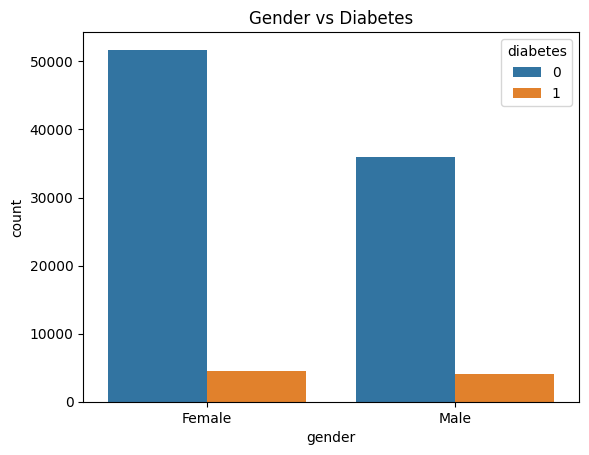

In [ ]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df_1)
plt.title('Gender vs Diabetes')
plt.show()


The bar plot shows the gender distribution of people with and without diabetes. The x-axis shows gender, and the y-axis shows the percentage of people in each gender category.

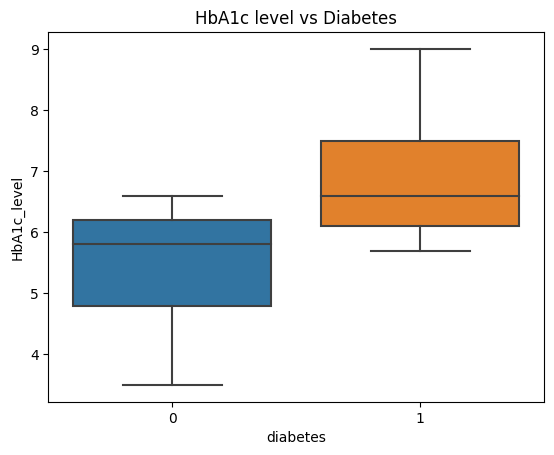

In [ ]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df_1)
plt.title('HbA1c level vs Diabetes')
plt.show()

The box and whisker plot showing HbA1c level versus diabetes shows that people with diabetes have significantly higher HbA1c levels than people without diabetes. The median HbA1c level for people with diabetes is 7.3%, while the median HbA1c level for people without diabetes is 5.3%.

The box and whisker plot also shows that the HbA1c distribution for people with diabetes is more spread out than the HbA1c distribution for people without diabetes. This is indicated by the larger interquartile range (IQR) for people with diabetes (2.2%) compared to the IQR for people without diabetes (1.1%).

The larger IQR for people with diabetes suggests that there is a greater variability in the HbA1c levels of people with diabetes than in the HbA1c levels of people without diabetes. This could be due to a number of factors, such as the different types of diabetes, the severity of diabetes, the presence of other comorbidities, and the effectiveness of diabetes treatment.

People with diabetes have significantly higher HbA1c levels than people without diabetes. This is because HbA1c is a measure of average blood sugar levels, and people with diabetes typically have higher blood sugar levels than people without diabetes.

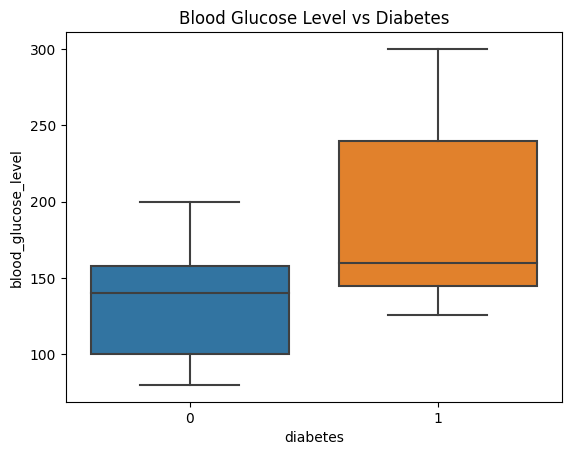

In [ ]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df_1)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

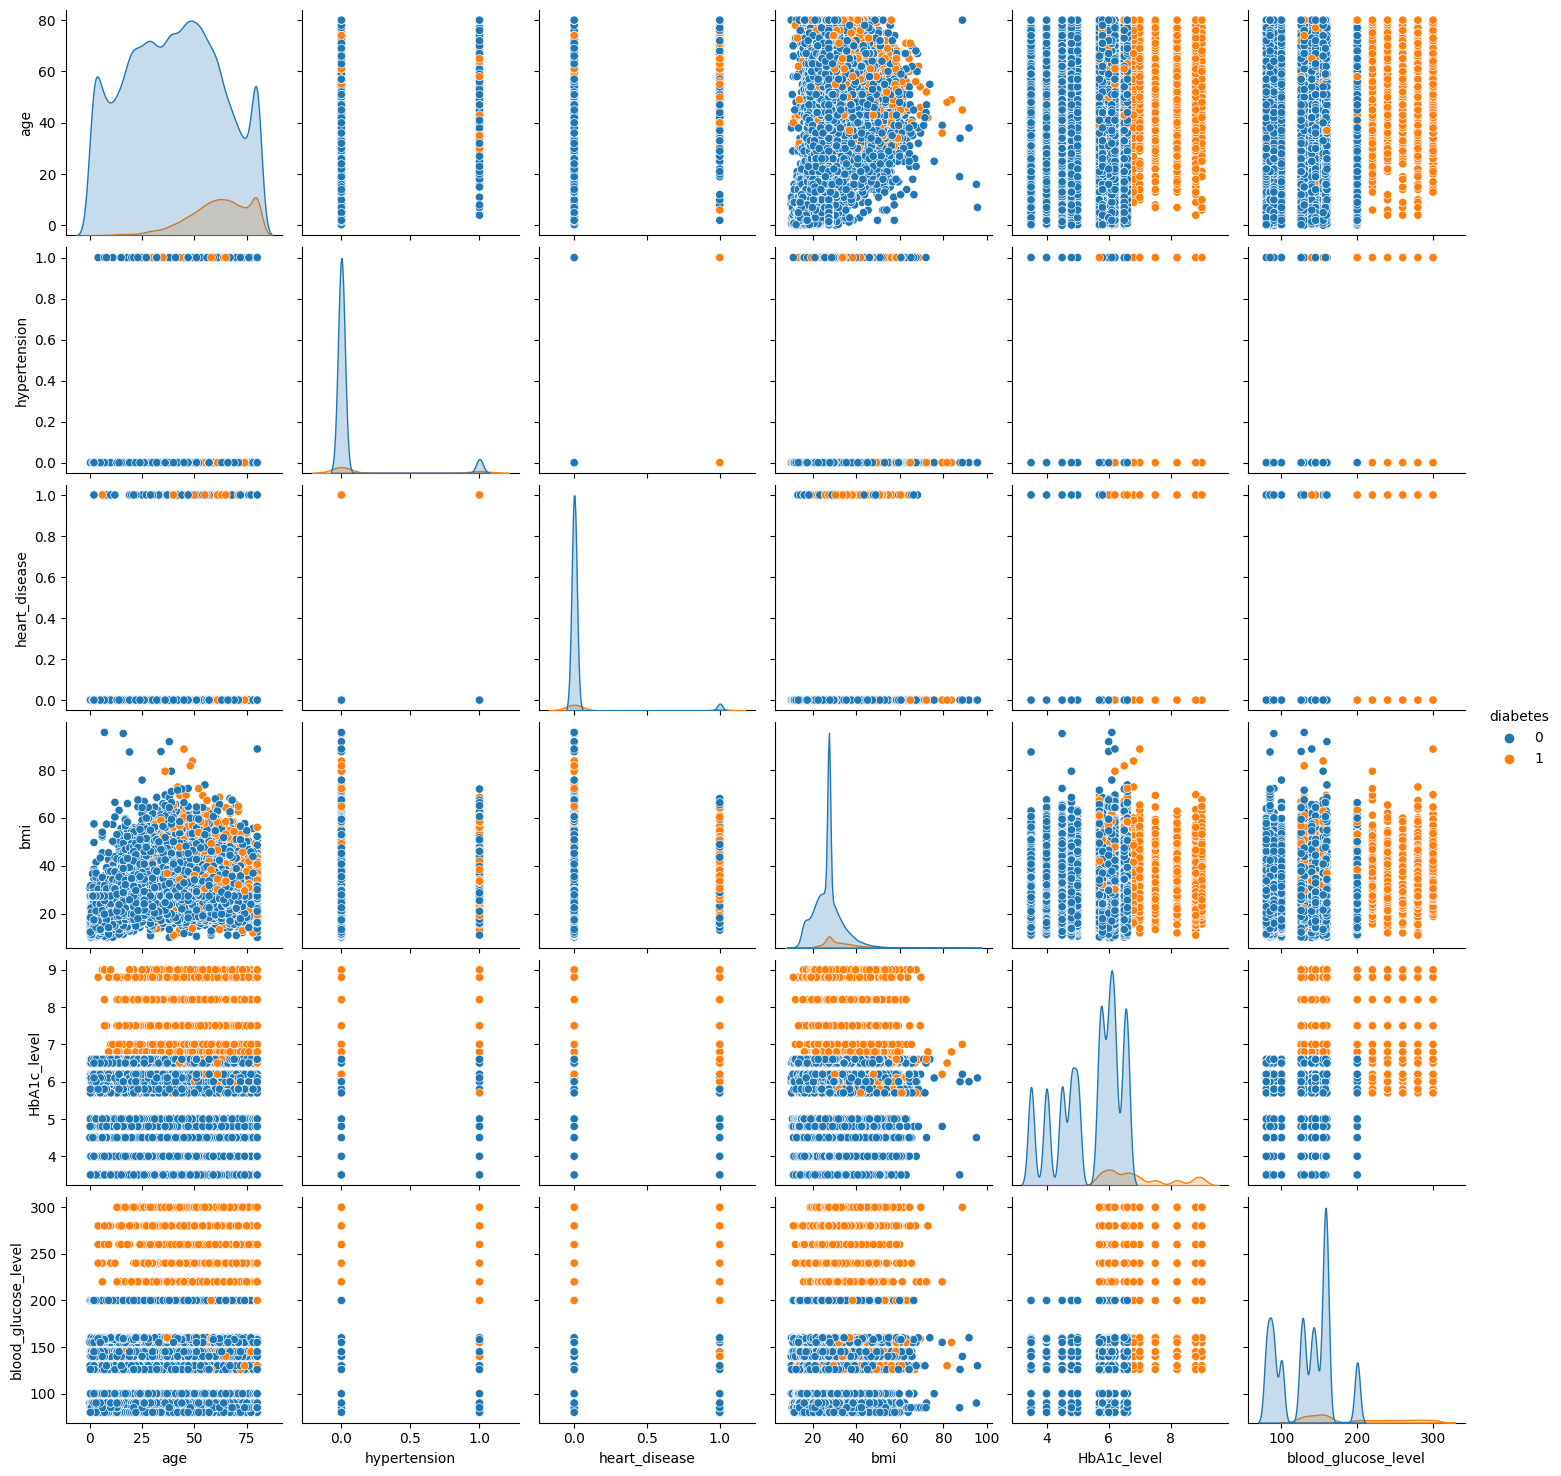

In [ ]:
# Pair plot for numeric features
sns.pairplot(df_1, hue='diabetes')
plt.show()

##### Multivariate analysis

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


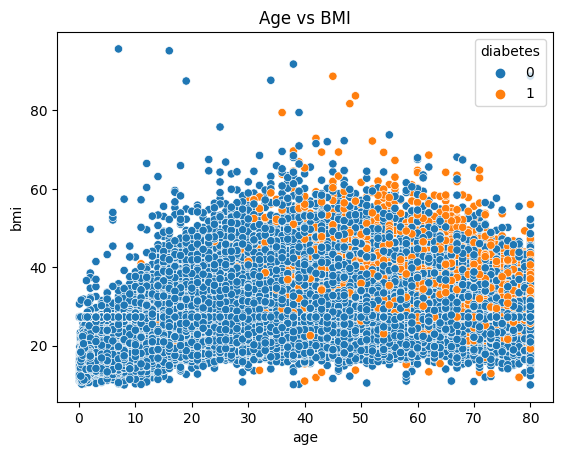

In [ ]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df_1)
plt.title('Age vs BMI')
plt.show()

The scatter plot of age versus BMI versus diabetes shows that there is a positive correlation between age, BMI, and diabetes. This means that older people are more likely to have a higher BMI and diabetes.

The scatter plot also shows that there is a stronger correlation between BMI and diabetes than between age and diabetes. This is evident by the tighter clustering of points around the regression line for BMI versus diabetes.
The regression line for BMI versus diabetes shows that the risk of diabetes increases with BMI. This is because obesity is a major risk factor for diabetes. Obesity can lead to insulin resistance and beta-cell dysfunction, which are both involved in the development of diabetes.

Overall, the scatter plot of age versus BMI versus diabetes provides strong evidence that age, BMI, and diabetes are all interrelated. Older people are more likely to have a higher BMI and diabetes. Additionally, there is a stronger correlation between BMI and diabetes than between age and diabetes. This suggests that BMI is a more important risk factor for diabetes than age.

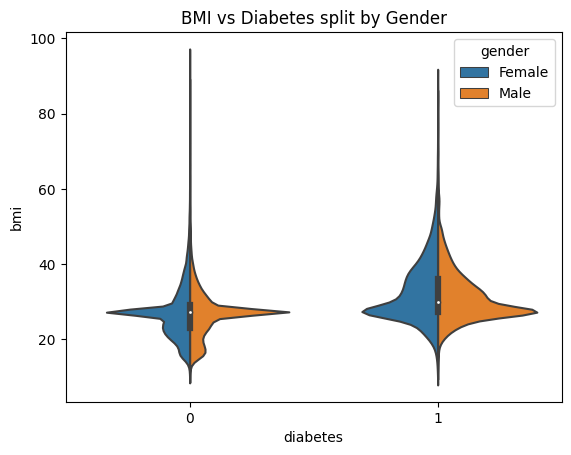

In [ ]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df_1)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

The analysis of BMI against diabetes classification split by gender shows that females are more likely to develop diabetes than males at a lower BMI. This is evident by the fact that the BMI cutoff point for diabetes classification is lower for females than for males.

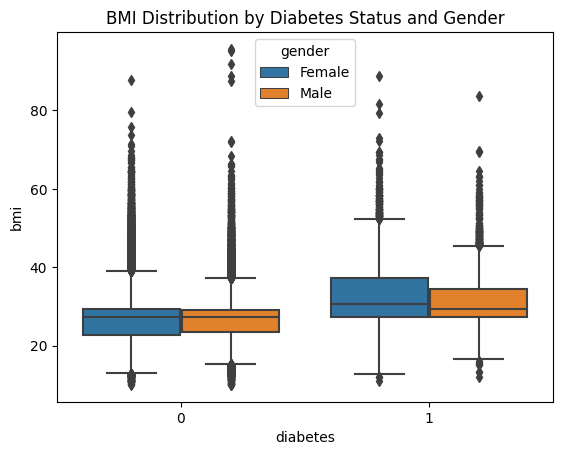

In [ ]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df_1)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

The boxplot shows the distribution of BMI by gender and diabetes status. The median BMI is higher for people with diabetes than for people without diabetes, for both males and females. However, the difference in median BMI between people with and without diabetes is greater for females than for males. This suggests that females are more likely to develop diabetes at a lower BMI than males.


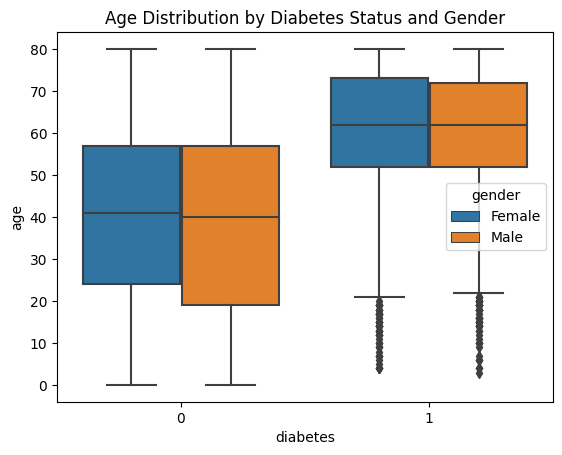

In [ ]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df_1)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

The boxplot shows the distribution of Age by gender and diabetes status. The median Age is higher for people with diabetes than for people without diabetes, for both males and females. However, the difference in median Age between people with and without diabetes is greater for females than for males. This suggests that females are more likely to develop diabetes at a lower Age than males.

##### CORRELATION

In [ ]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df_1['smoking_history'] = df_1['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df_1['smoking_history'].value_counts())

non-smoker     67276
past_smoker    19655
current         9197
Name: smoking_history, dtype: int64


In [ ]:
data = df_1.copy()

In [ ]:
def perform_one_hot_encoding(df_1, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df_1[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df_1 = pd.concat([df_1.drop(column_name, axis=1), dummies], axis=1)

    return df_1

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

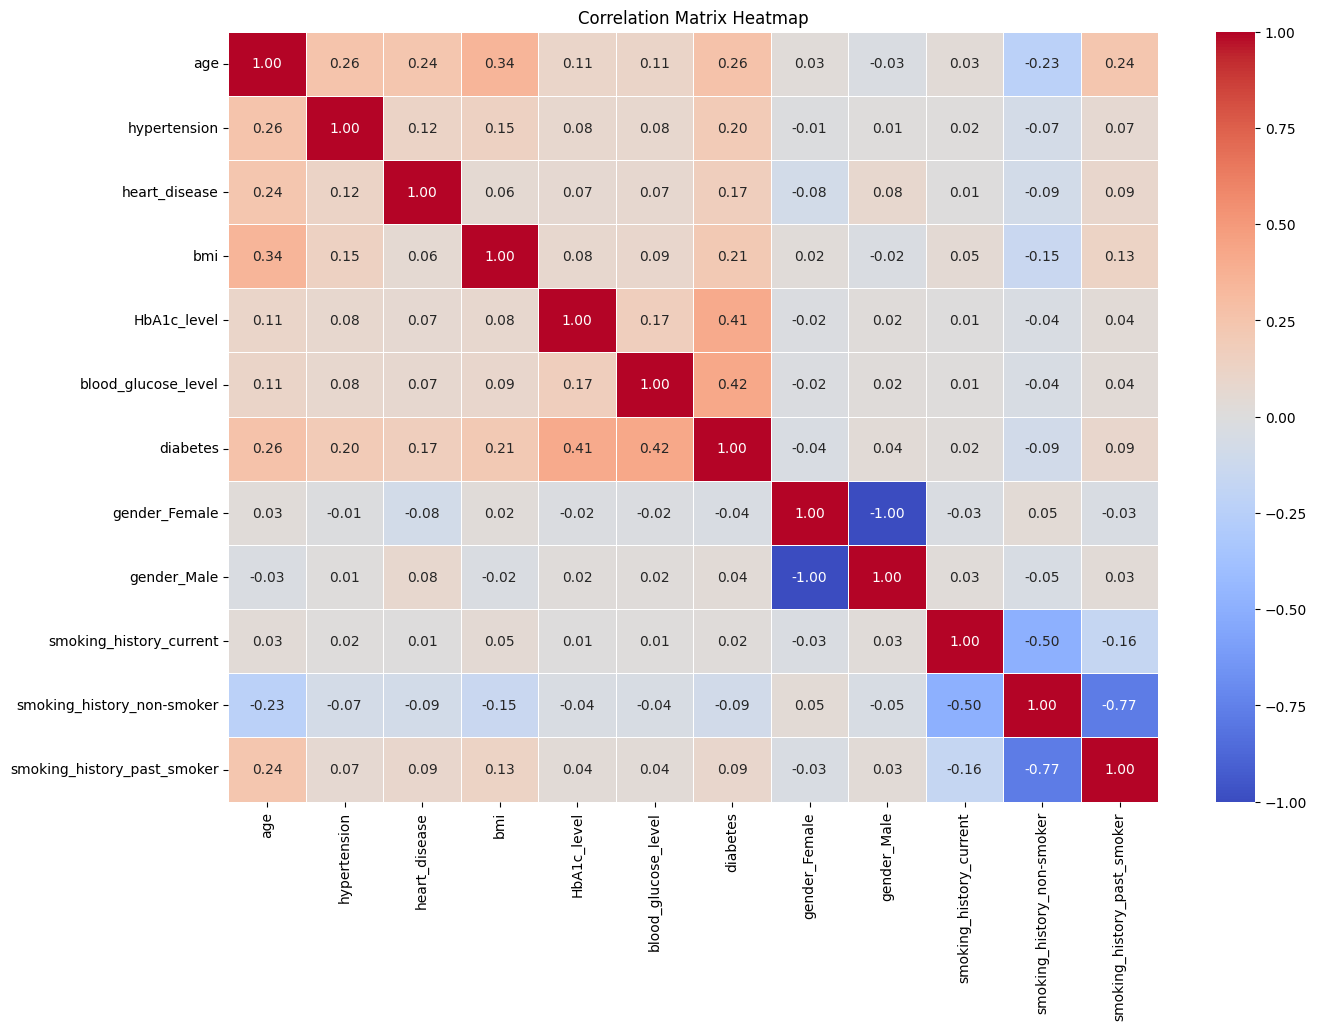

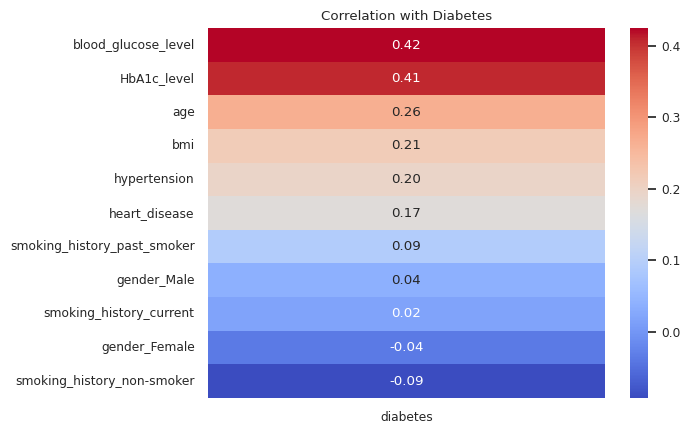

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

The correlation matrix shows the strength and direction of the relationships between all pairs of variables in the dataset. The values in the matrix range from -1 to 1, with a value of -1 indicating a perfect negative correlation, a value of 1 indicating a perfect positive correlation, and a value of 0 indicating no correlation.

The correlation matrix for the diabetes dataset shows that there are strong positive correlations between age, BMI, HbA1c level, blood glucose level, and diabetes status. This means that people who are older, have a higher BMI, have a higher HbA1c level, and have a higher blood glucose level are more likely to have diabetes.

The correlation matrix also shows that there is a weak positive correlation between gender and diabetes status. This means that males are slightly more likely to have diabetes than females.

There are a few possible explanations for the correlations between the variables in the diabetes dataset. One possibility is that these variables are all causally related to diabetes. For example, obesity (as measured by BMI) is a major risk factor for diabetes. Obesity can lead to insulin resistance and beta-cell dysfunction, which are both involved in the development of diabetes.

Another possibility is that the correlations between the variables in the diabetes dataset are due to confounding factors. Confounding factors are variables that are associated with both the exposure (in this case, diabetes) and the outcome (in this case, the other variables in the dataset). For example, age is a confounding factor in the relationship between BMI and diabetes. This is because older people are more likely to be obese and more likely to have diabetes.

Finally, it is also possible that the correlations between the variables in the diabetes dataset are due to chance. This is especially likely for the weak correlation between gender and diabetes status.

#### PREDICTIVE ANALYSIS

#### A. SVM

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
df_encoded = pd.get_dummies(df_1, columns=['gender', 'smoking_history'])

# Assuming 'target_column' is the column you want to predict
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_SV = svm.SVC(kernel='linear')
model_SV.fit(X_train, y_train)

X_test_prediction = model_SV.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)

precision, recall, f1, _ = precision_recall_fscore_support(y_test, X_test_prediction, average='binary')
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy score of test data: 0.9571933839592219
Precision: 0.8878091872791519
Recall: 0.5908289241622575
F1 score: 0.709495234733498


#### B. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

model_RF = RandomForestClassifier(n_estimators=10, random_state=42)
model_RF.fit(X_train, y_train)
X_test_prediction = model_RF.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, X_test_prediction, average='binary')
print(precision)
print(recall)
print(f1)

Accuracy score of test data :  0.9656714865286591
0.917401764234162
0.6725455614344503
0.7761194029850746


#### C. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

model_KN = KNeighborsClassifier(n_neighbors=5)
model_KN.fit(X_train, y_train)
X_test_prediction = model_KN.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, X_test_prediction, average='binary')
print(precision)
print(recall)
print(f1)

Accuracy score of test data :  0.9505357328617497
0.8720238095238095
0.5167548500881834
0.6489479512735328


#### D. LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
X_test_prediction = model_LR.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, X_test_prediction, average='binary')
print(precision)
print(recall)
print(f1)

Accuracy score of test data :  0.9571933839592219
0.8598360655737705
0.6166960611405056
0.7182471756247859


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### E. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)
X_test_prediction = model_DT.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, X_test_prediction, average='binary')
print(precision)
print(recall)
print(f1)

Accuracy score of test data :  0.9487672942889837
0.7093567251461989
0.7131099353321576
0.7112283787745529


accuracy_scores for different models

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


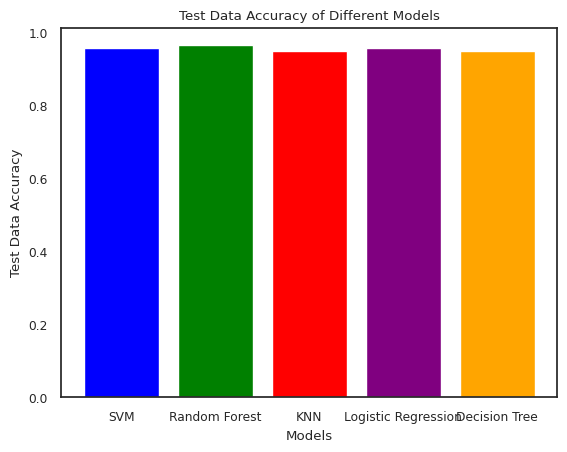

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X_train, y_train, X_test, y_test defined

models = ['SVM', 'Random Forest', 'KNN', 'Logistic Regression', 'Decision Tree']
accuracy_scores = []

# SVM
model_SV = SVC(kernel='linear')
model_SV.fit(X_train, y_train)
X_test_prediction_SV = model_SV.predict(X_test)
test_data_accuracy_SV = accuracy_score(y_test, X_test_prediction_SV)
accuracy_scores.append(test_data_accuracy_SV)

# Random Forest
model_RF = RandomForestClassifier(n_estimators=10, random_state=42)
model_RF.fit(X_train, y_train)
X_test_prediction_RF = model_RF.predict(X_test)
test_data_accuracy_RF = accuracy_score(y_test, X_test_prediction_RF)
accuracy_scores.append(test_data_accuracy_RF)

# KNN
model_KN = KNeighborsClassifier(n_neighbors=5)
model_KN.fit(X_train, y_train)
X_test_prediction_KN = model_KN.predict(X_test)
test_data_accuracy_KN = accuracy_score(y_test, X_test_prediction_KN)
accuracy_scores.append(test_data_accuracy_KN)

# Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
X_test_prediction_LR = model_LR.predict(X_test)
test_data_accuracy_LR = accuracy_score(y_test, X_test_prediction_LR)
accuracy_scores.append(test_data_accuracy_LR)

# Decision Tree
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)
X_test_prediction_DT = model_DT.predict(X_test)
test_data_accuracy_DT = accuracy_score(y_test, X_test_prediction_DT)
accuracy_scores.append(test_data_accuracy_DT)

# Plotting
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Test Data Accuracy')
plt.title('Test Data Accuracy of Different Models')
plt.show()


This illustrates the comparision between the accuracy scores. The x-axis shows the model type, and the y-axis shows the accuracy score. The accuracy score is a measure of how well a model is able to generalize to unseen data.

The graph shows that the Random Forest model has the highest accuracy score 96.5% This suggests that the Random Forest model is the best model for generalizing to unseen data from the diabetes dataset.

F1_Score for different Classifiers

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


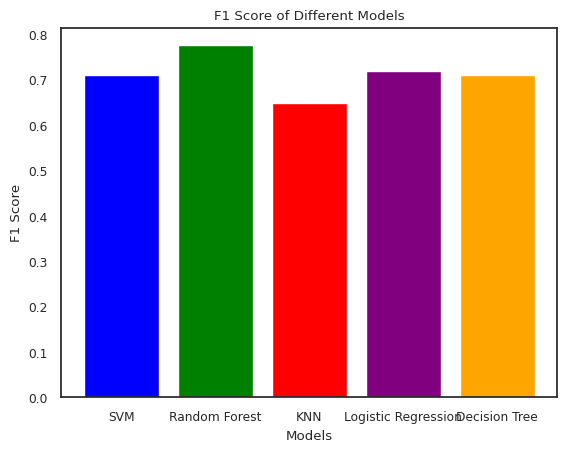

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Assuming you have X_train, y_train, X_test, y_test defined

models = ['SVM', 'Random Forest', 'KNN', 'Logistic Regression', 'Decision Tree']
f1_scores = []

# SVM
model_SV = SVC(kernel='linear')
model_SV.fit(X_train, y_train)
X_test_prediction_SV = model_SV.predict(X_test)
_, _, f1_SV, _ = precision_recall_fscore_support(y_test, X_test_prediction_SV, average='binary')
f1_scores.append(f1_SV)

# Random Forest
model_RF = RandomForestClassifier(n_estimators=10, random_state=42)
model_RF.fit(X_train, y_train)
X_test_prediction_RF = model_RF.predict(X_test)
_, _, f1_RF, _ = precision_recall_fscore_support(y_test, X_test_prediction_RF, average='binary')
f1_scores.append(f1_RF)

# KNN
model_KN = KNeighborsClassifier(n_neighbors=5)
model_KN.fit(X_train, y_train)
X_test_prediction_KN = model_KN.predict(X_test)
_, _, f1_KN, _ = precision_recall_fscore_support(y_test, X_test_prediction_KN, average='binary')
f1_scores.append(f1_KN)

# Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
X_test_prediction_LR = model_LR.predict(X_test)
_, _, f1_LR, _ = precision_recall_fscore_support(y_test, X_test_prediction_LR, average='binary')
f1_scores.append(f1_LR)

# Decision Tree
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)
X_test_prediction_DT = model_DT.predict(X_test)
_, _, f1_DT, _ = precision_recall_fscore_support(y_test, X_test_prediction_DT, average='binary')
f1_scores.append(f1_DT)

# Plotting
plt.bar(models, f1_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Models')
plt.show()


This shows the F1 scores of different classification models. The x-axis shows the classification model, and the y-axis shows the F1 score. The graph shows that the Random Forest model has the highest F1 score of 77.6%.